In [2]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
user = "root"
password = ""
host = "localhost"
port = "3306"
database = "norp"

In [5]:
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

### Top-Level NTEE Category Distribution

This bar chart shows the number of organizations grouped by their NTEE Level 1 category (e.g., 501C3 CHARITY, 501CX NONPROFIT). It provides a broad overview of the types of nonprofits in the dataset.


In [11]:
query = """
    SELECT nccs_level_1_category, COUNT(*) AS count
    FROM nccs_bmf
    WHERE nccs_level_1_category IS NOT NULL
    GROUP BY nccs_level_1_category
    ORDER BY count DESC;
"""

df = pd.read_sql(query, engine)

/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/4216703982.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='count', y='nccs_level_1_category', palette="viridis")


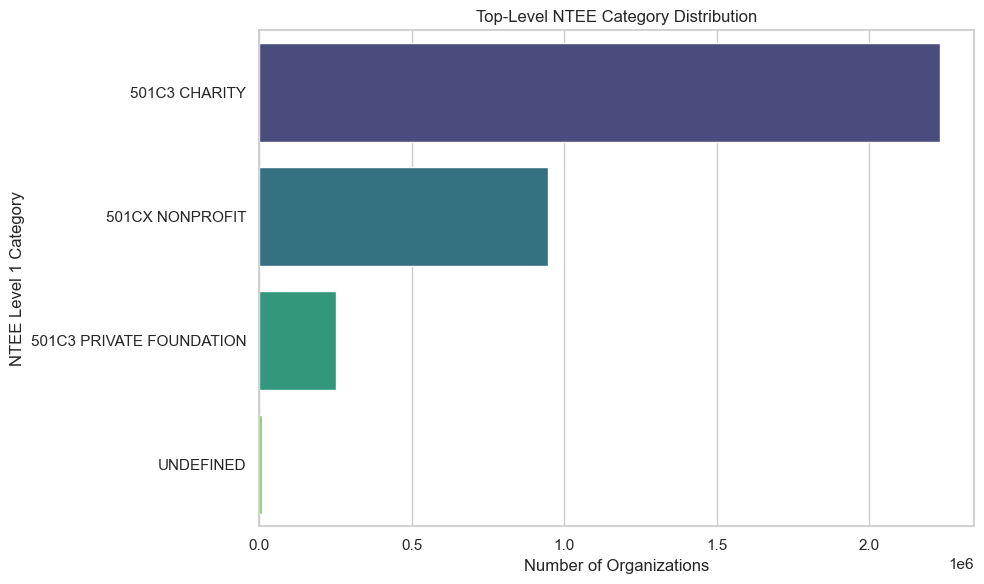

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='count', y='nccs_level_1_category', palette="viridis")
plt.title("Top-Level NTEE Category Distribution")
plt.xlabel("Number of Organizations")
plt.ylabel("NTEE Level 1 Category")
plt.tight_layout()
plt.show()

**Inference**: The majority of organizations fall under 501C3 CHARITY, followed by 501CX NONPROFIT, indicating a dominant share of charity activity.

### Nonprofit Registrations Over Time (Fiscal Year)

This line chart shows the number of nonprofit organizations across fiscal years. The fiscal year associated with the organization's most recent IRS filing or financial record.

This visualization helps understand the trend of IRS flings over the years


In [21]:
# Run SQL query to count orgs by ruling year
query = """
SELECT ORG_FISCAL_YEAR, COUNT(*) AS org_count
FROM NCCS_Address_Metadata_org_loc
GROUP BY ORG_FISCAL_YEAR
ORDER BY ORG_FISCAL_YEAR
"""
df_fiscal_year = pd.read_sql(query, engine)

# Display the DataFrame to inspect it
df_fiscal_year.head(10)

,ORG_FISCAL_YEAR,org_count
0,1989,193114
1,1995,23304
2,1996,42524
3,1997,22979
4,1998,34540
5,1999,15076
6,2000,32304
7,2001,9972
8,2002,19246
9,2003,44254


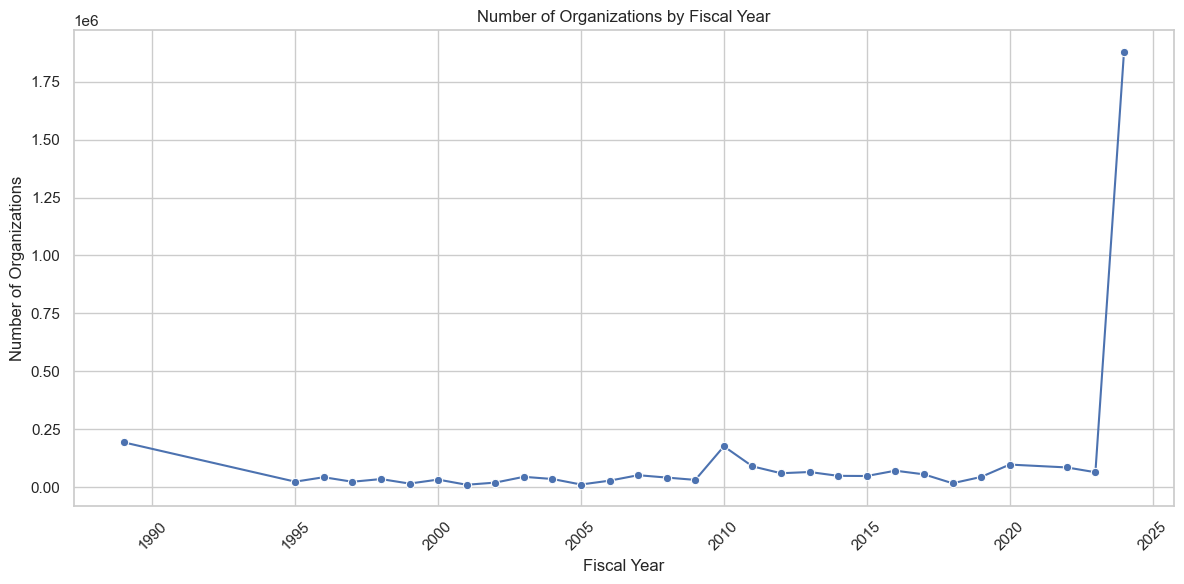

In [24]:
# Set plot style
sns.set(style="whitegrid")

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_fiscal_year, x='ORG_FISCAL_YEAR', y='org_count', marker="o")

# Titles and labels
plt.title("Number of Organizations by Fiscal Year")
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Organizations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Key Inference:  
The number of nonprofit organizations reporting IRS filings or financial records each fiscal year has fluctuated over time. Distinct periods of growth are visible, with notable increases in certain decades, and a huge spike recently. The unavailability of data along with changes in policy, economic conditions, or social needs can be attributed to these trends.


### Nonprofit Registrations Over Time (Ruling Year)

This line chart shows the number of nonprofit organizations granted tax-exempt status by the IRS each year, based on their `organization_ruling_date`.

Each point on the graph represents the count of new organizations recognized in that year. This visualization helps understand the overall growth of the nonprofit sector and highlights key inflection points across decades.


In [85]:
# Run SQL query to count orgs by ruling year
query = """
    SELECT YEAR(organization_ruling_date) AS ruling_year, COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE organization_ruling_date IS NOT NULL
    GROUP BY ruling_year
    ORDER BY ruling_year;
"""
df_ruling_year = pd.read_sql(query, engine)

# Display the DataFrame to inspect it
df_ruling_year.head(10)

,ruling_year,org_count
0,1900,612
1,1901,17
2,1902,2
3,1903,10
4,1904,22
5,1905,13
6,1906,3
7,1907,6
8,1908,19
9,1909,2


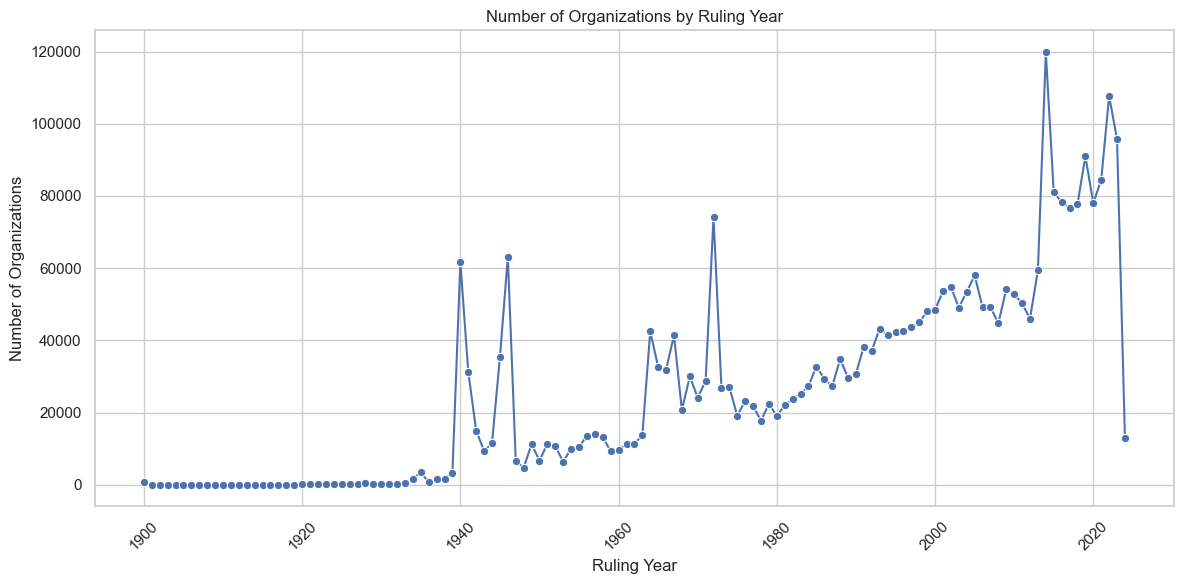

In [14]:
# Set plot style
sns.set(style="whitegrid")

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ruling_year, x='ruling_year', y='org_count', marker="o")

# Titles and labels
plt.title("Number of Organizations by Ruling Year")
plt.xlabel("Ruling Year")
plt.ylabel("Number of Organizations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Inference**:  
There is a clear upward trend in nonprofit formation starting in the late 1970s, with major surges around 2010–2015. The post-2020 drop may reflect delayed filings or incomplete data. Spikes in earlier years (e.g., 1940s, 1970s) may correspond to policy changes or major social movements.

### Number of Nonprofit Organizations Across States

This bar chart displays the orgazinational count across the 57 entities, which aligns with the full set of U.S. states and territories as reported by the U.S. Census Bureau. . 
The plot helps identify states that attract of nonprofit activity across the country.

In [6]:
# Run SQL query for Number of organizations per state
query = """
SELECT s.CENSUS_STATE_NAME, COUNT(*) AS org_count
FROM NCCS_Address_Metadata_org_loc o
JOIN NCCS_Address_Metadata_census_blocks b ON o.CENSUS_BLOCK_FIPS = b.CENSUS_BLOCK_FIPS
JOIN NCCS_Address_Metadata_tracts t ON b.CENSUS_TRACT_FIPS = t.CENSUS_TRACT_FIPS
JOIN NCCS_Address_Metadata_states s ON t.CENSUS_STATE_FIPS = s.CENSUS_STATE_FIPS
GROUP BY s.CENSUS_STATE_NAME
ORDER BY org_count DESC
"""
df_state_cnt = pd.read_sql(query, engine)

# Display the DataFrame to inspect it
df_state_cnt.head(10)

,CENSUS_STATE_NAME,org_count
0,California,362201
1,Texas,252292
2,New York,210867
3,Florida,188694
4,Illinois,145292
5,Pennsylvania,141127
6,Ohio,138809
7,Michigan,105160
8,Georgia,101845
9,North Carolina,97615


/var/folders/k9/v092rk_s0bncwn07z3t247qm0000gn/T/ipykernel_2861/3075531822.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_state_cnt, x='CENSUS_STATE_NAME', y='org_count', palette="viridis")


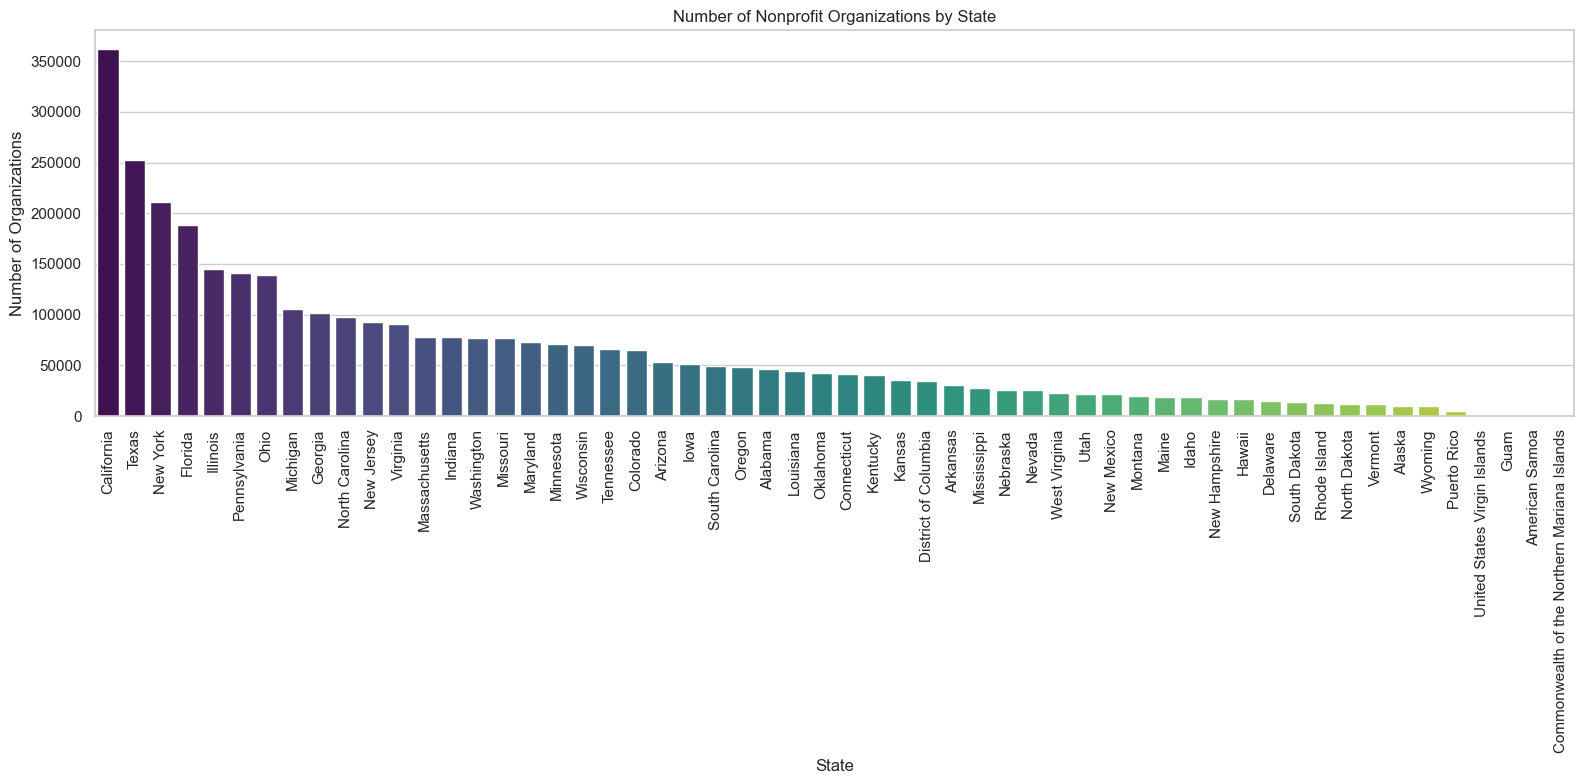

In [8]:
# Set plot style
sns.set(style="whitegrid")
# Plot vertical bar graph of organization count by state
plt.figure(figsize=(16, 8))
sns.barplot(data=df_state_cnt, x='CENSUS_STATE_NAME', y='org_count', palette="viridis")
plt.title("Number of Nonprofit Organizations by State")
plt.xlabel("State")
plt.ylabel("Number of Organizations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Key Inference:  
The distribution of nonprofit organizations across states is highly uneven, with a small number of states—such as California, Texas, and New York—hosting a disproportionately large share of organizations. This likely reflects population size, economic activity, and the presence of major metropolitan areas. States with smaller populations or more rural characteristics tend to have fewer nonprofits, highlighting regional disparities in nonprofit sector presence and potentially in access to nonprofit services.


### Top 15 CBSAs by Number of Nonprofit Organizations

This section identifies the 15 Core-Based Statistical Areas (CBSAs) with the highest number of nonprofit organizations. 
CBSAs represent metropolitan and micropolitan areas as defined by the U.S. Office of Management and Budget, providing a regional perspective that often spans multiple counties or cities.

The following bar chart visualizes the top 15 CBSAs by their nonprofit organization counts, offering insight into the metropolitan areas that serve as key centers for the nonprofit sector.


In [27]:
query = """
SELECT cb.CENSUS_CBSA_NAME, COUNT(*) AS org_count
FROM NCCS_Address_Metadata_org_loc o
JOIN NCCS_Address_Metadata_census_blocks b ON o.CENSUS_BLOCK_FIPS = b.CENSUS_BLOCK_FIPS
JOIN NCCS_Address_Metadata_tracts t ON b.CENSUS_TRACT_FIPS = t.CENSUS_TRACT_FIPS
JOIN NCCS_Address_Metadata_counties c ON t.CENSUS_COUNTY_FIPS = c.CENSUS_COUNTY_FIPS
JOIN NCCS_Address_Metadata_cbsa cb ON c.CENSUS_CBSA_FIPS = cb.CENSUS_CBSA_FIPS
GROUP BY cb.CENSUS_CBSA_NAME
ORDER BY org_count DESC
LIMIT 15
"""
df_cbsa_cnt = pd.read_sql(query, engine)

# Display the DataFrame to inspect it
df_cbsa_cnt.head(10)

,CENSUS_CBSA_NAME,org_count
0,"San Juan-Bayamón-Caguas, PR",1482689
1,"New York-Newark-Jersey City, NY-NJ-PA",1326094
2,"Washington-Arlington-Alexandria, DC-VA-MD-WV",1038533
3,"Chicago-Naperville-Elgin, IL-IN-WI",666031
4,"Minneapolis-St. Paul-Bloomington, MN-WI",646627
5,"Atlanta-Sandy Springs-Alpharetta, GA",645518
6,"Cincinnati, OH-KY-IN",634950
7,"Kansas City, MO-KS",631415
8,"Denver-Aurora-Lakewood, CO",590307
9,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",529247


/var/folders/k9/v092rk_s0bncwn07z3t247qm0000gn/T/ipykernel_2861/4074088028.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cbsa_cnt, x='CENSUS_CBSA_NAME', y='org_count', palette="mako")


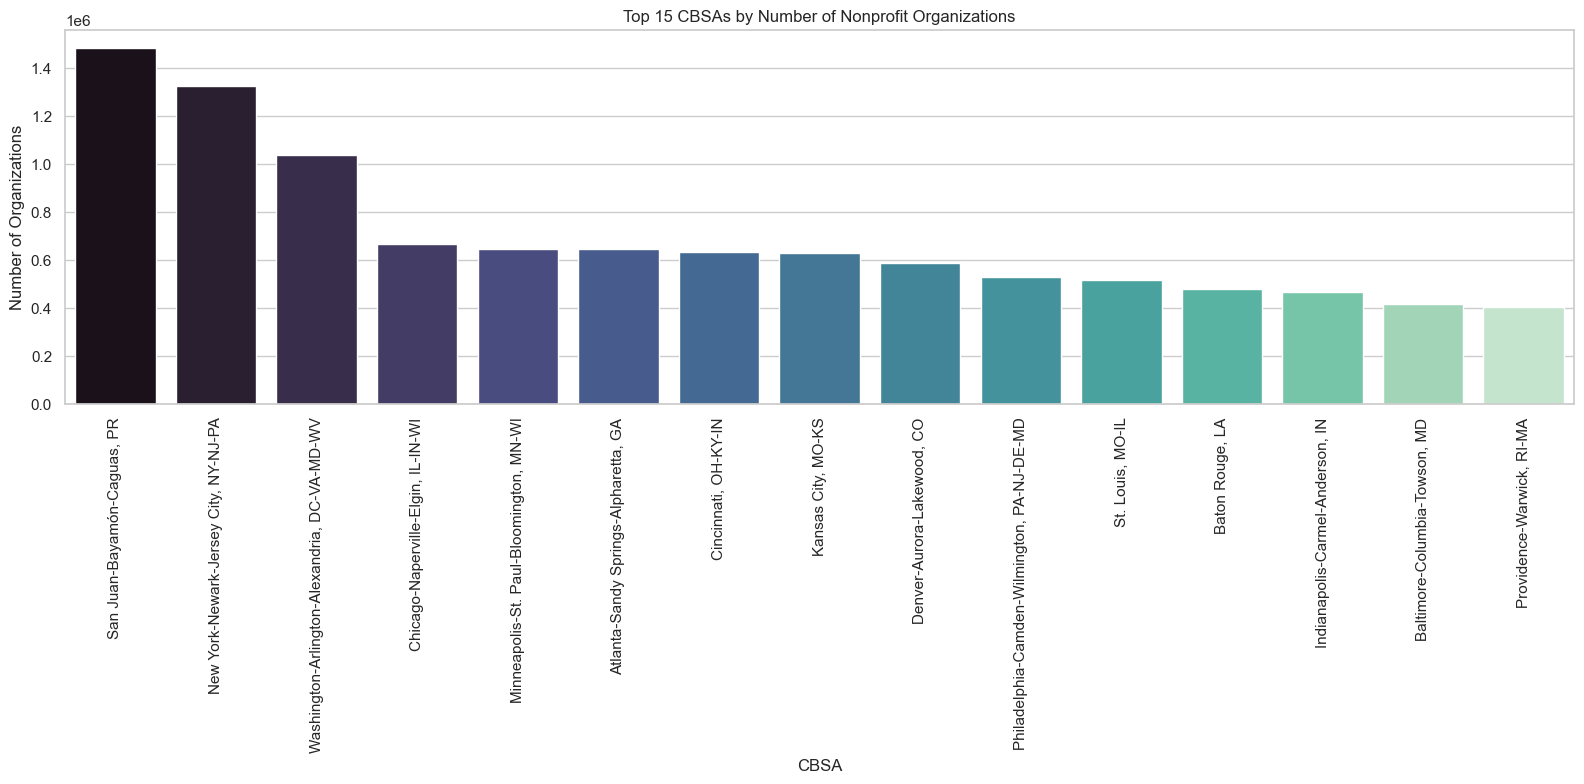

In [28]:
# Set plot style
sns.set(style="whitegrid")

# Plot vertical bar graph of organization count by CBSA
plt.figure(figsize=(16, 8))
sns.barplot(data=df_cbsa_cnt, x='CENSUS_CBSA_NAME', y='org_count', palette="mako")
plt.title("Top 15 CBSAs by Number of Nonprofit Organizations")
plt.xlabel("CBSA")
plt.ylabel("Number of Organizations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Key Inferences:

Large urban areas such as New York, Washington D.C., and Chicago lead the list, reflecting both population density and the presence of diverse nonprofit sectors. The presence of multiple CBSAs from the same state (e.g., New York-Newark-Jersey City, NY-NJ-PA and Washington-Arlington-Alexandria, DC-VA-MD-WV) highlights the regional clustering of nonprofit organizations. These metropolitan hubs likely benefit from greater access to resources, funding, and collaborative opportunities, which may further reinforce their status as nonprofit centers.Policymakers and sector leaders may consider these concentrations when designing outreach, funding, or support programs, as well as when seeking to understand gaps in nonprofit service coverage in less-represented areas.


### Top 15 Counties by Number of Nonprofit Organizations

This bar chart displays the 15 counties across the country with the highest number of nonprofit organizations.
The plot hones in on a more closer geographical view of which counties become bases for non profit activity.



In [9]:
# Run SQL query for Number of organizations per state
query = """
SELECT c.CENSUS_COUNTY_NAME, COUNT(*) AS org_count
FROM NCCS_Address_Metadata_org_loc o
JOIN NCCS_Address_Metadata_census_blocks b ON o.CENSUS_BLOCK_FIPS = b.CENSUS_BLOCK_FIPS
JOIN NCCS_Address_Metadata_tracts t ON b.CENSUS_TRACT_FIPS = t.CENSUS_TRACT_FIPS
JOIN NCCS_Address_Metadata_counties c ON t.CENSUS_COUNTY_FIPS = c.CENSUS_COUNTY_FIPS
GROUP BY c.CENSUS_COUNTY_NAME
ORDER BY org_count DESC
LIMIT 15
"""
df_county_cnt = pd.read_sql(query, engine)

# Display the DataFrame to inspect it
df_county_cnt.head(10)

,CENSUS_COUNTY_NAME,org_count
0,Jefferson County,736115
1,Adams County,727461
2,Franklin County,682944
3,Jackson County,576465
4,Madison County,513126
5,Douglas County,484271
6,Lincoln County,424830
7,Clinton County,416568
8,Anderson County,409167
9,Campbell County,404718


/var/folders/k9/v092rk_s0bncwn07z3t247qm0000gn/T/ipykernel_2861/132748616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_county_cnt, x='CENSUS_COUNTY_NAME', y='org_count', palette="crest")


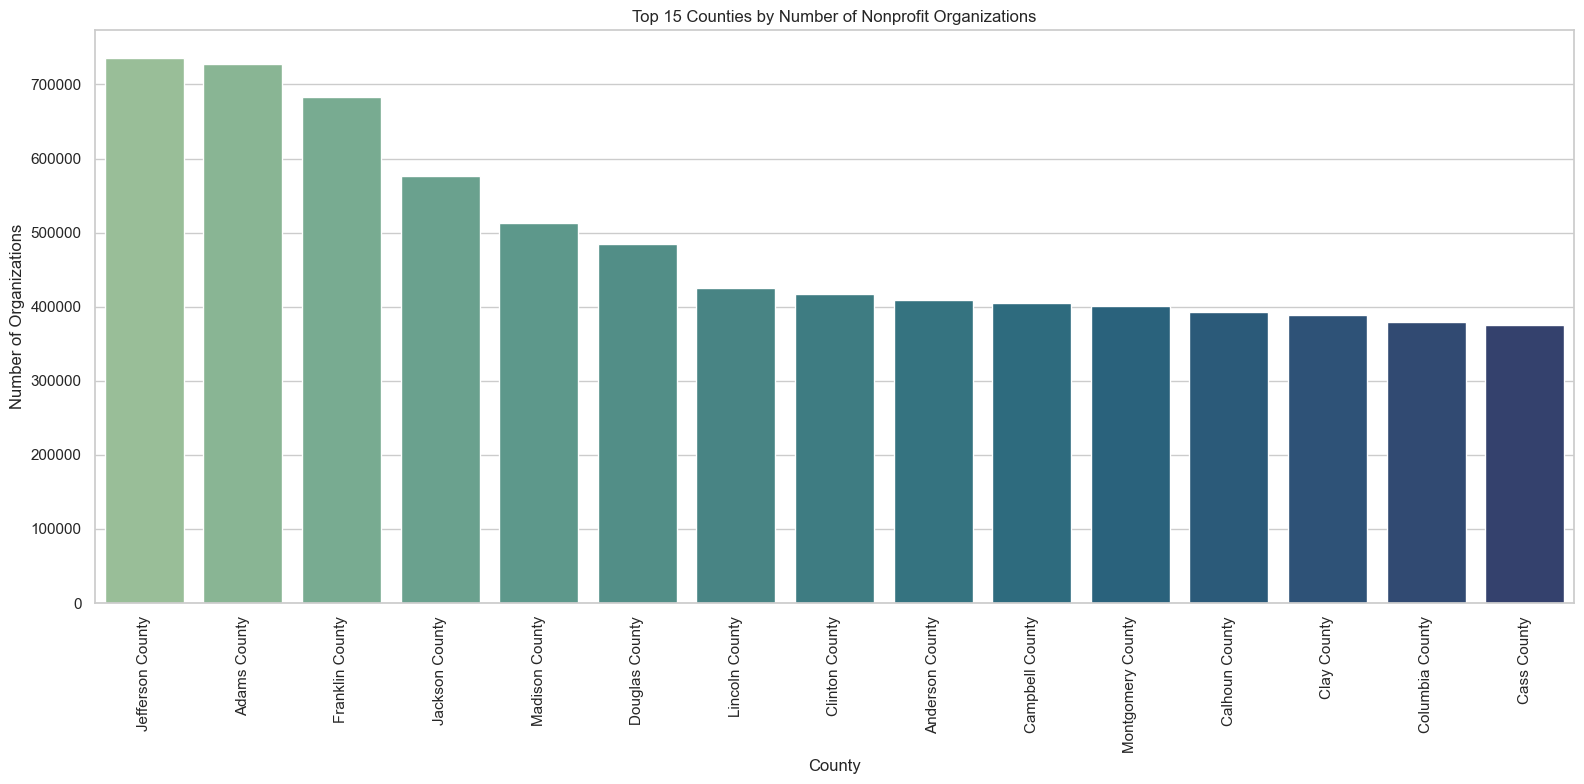

In [10]:
# Set plot style
sns.set(style="whitegrid")

# Plot vertical bar graph of organization count by county
plt.figure(figsize=(16, 8))
sns.barplot(data=df_county_cnt, x='CENSUS_COUNTY_NAME', y='org_count', palette="crest")
plt.title("Top 15 Counties by Number of Nonprofit Organizations")
plt.xlabel("County")
plt.ylabel("Number of Organizations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Key Inferences:

here is a significant clustering of nonprofit activity in certain counties, which may correspond to large metropolitan areas or population centers.


### View top counties for a given state by Number of Nonprofit Organizations

This bar chart presents the top 15 countes in the state of Georgia ranked by the number of nonprofit organizations.

This visualization demonstrates how nonprofit activity is distributed within a single state across counties and can be easily reused to explore other states by adjusting the SQL filter. It enables focused geographic analysis and helps compare nonprofit concentration across different urban regions within a state.


In [19]:

# Set your target state 
target_state = 'Georgia'

# SQL query to get top 15 counties by number of organizations in the target state
query = f"""
SELECT 
  c.CENSUS_COUNTY_NAME,
  COUNT(*) AS org_count
FROM NCCS_Address_Metadata_org_loc o
JOIN NCCS_Address_Metadata_census_blocks b 
  ON o.CENSUS_BLOCK_FIPS = b.CENSUS_BLOCK_FIPS
JOIN NCCS_Address_Metadata_tracts t 
  ON b.CENSUS_TRACT_FIPS = t.CENSUS_TRACT_FIPS
JOIN NCCS_Address_Metadata_counties c 
  ON t.CENSUS_COUNTY_FIPS = c.CENSUS_COUNTY_FIPS
JOIN NCCS_Address_Metadata_states s 
  ON t.CENSUS_STATE_FIPS = s.CENSUS_STATE_FIPS
WHERE s.CENSUS_STATE_NAME = '{target_state}'
GROUP BY c.CENSUS_COUNTY_NAME
ORDER BY org_count DESC
LIMIT 15;
"""
df_county_state = pd.read_sql(query, engine)

# Display the results
df_county_state.head(10)


,CENSUS_COUNTY_NAME,org_count
0,Madison County,48903
1,Fulton County,22704
2,Montgomery County,22350
3,Marion County,21932
4,Henry County,21807
5,Jefferson County,20929
6,Knox County,19554
7,Howard County,18642
8,Miami County,18437
9,Rankin County,18017


/var/folders/k9/v092rk_s0bncwn07z3t247qm0000gn/T/ipykernel_2861/1126065998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_county_state, x='org_count', y='CENSUS_COUNTY_NAME', palette="crest")


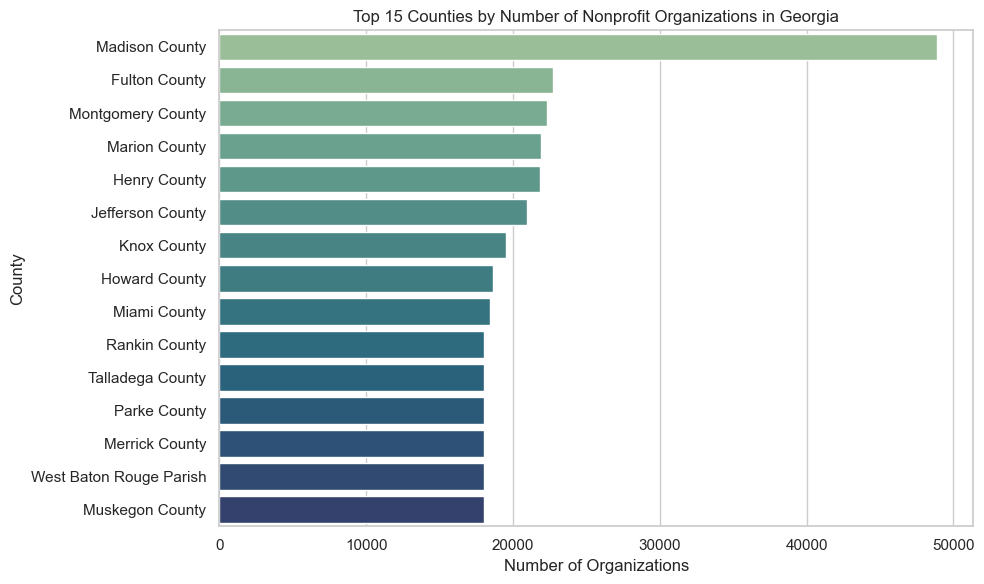

In [20]:
# Set plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_county_state, x='org_count', y='CENSUS_COUNTY_NAME', palette="crest")

# Add labels and title
plt.title(f"Top 15 Counties by Number of Nonprofit Organizations in {target_state}")
plt.xlabel("Number of Organizations")
plt.ylabel("County")
plt.tight_layout()
plt.show()


#### Key Inferences:

The chart above shows the top 15 counties in Georgia by the number of nonprofit organizations.The distribution is highly concentrated: a few counties (such as Fulton and DeKalb) have a much higher number of nonprofits compared to others, reflecting the population and economic activity in those areas.


### Top 15 Cities by Number of Nonprofit Organizations

This horizontal bar chart displays the 15 U.S. cities with the highest number of nonprofit organizations, based on IRS registration data. 
The plot aggregates the total number of nonprofits per city, highlighting geographic hubs of nonprofit activity across the country.



In [12]:
# SQL query to get top 15 cities by number of organizations
query = """
    SELECT city, COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE city IS NOT NULL AND city != ''
    GROUP BY city
    ORDER BY org_count DESC
    LIMIT 15;
"""
df_city = pd.read_sql(query, engine)

# Display the results
df_city.head(10)


ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'norp.nccs_bmf' doesn't exist")
[SQL: 
    SELECT city, COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE city IS NOT NULL AND city != ''
    GROUP BY city
    ORDER BY org_count DESC
    LIMIT 15;
]
(Background on this error at: https://sqlalche.me/e/20/f405)

/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/3408979358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_city, x='org_count', y='city', palette="magma")


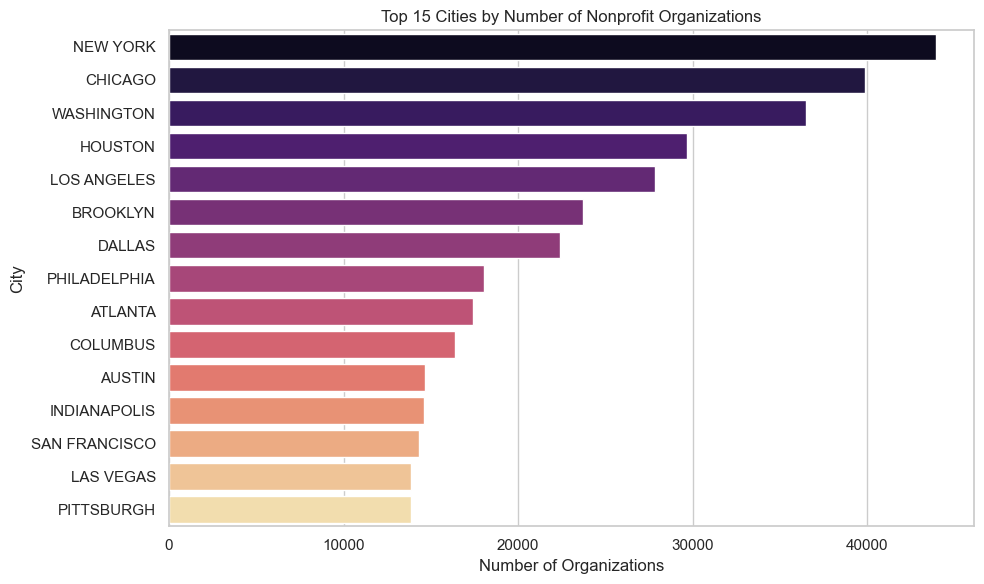

In [16]:
# Set plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_city, x='org_count', y='city', palette="magma")

# Add labels and title
plt.title("Top 15 Cities by Number of Nonprofit Organizations")
plt.xlabel("Number of Organizations")
plt.ylabel("City")
plt.tight_layout()
plt.show()



**Key Inference**:  
Major metropolitan areas such as New York, Chicago, and Washington D.C. host the largest nonprofit sectors, likely due to higher population density, infrastructure, philanthropic networks, and economic diversity. Cities like Austin and Columbus also show strong nonprofit presence relative to their size, indicating regional hubs of civic engagement.

### View top cities for a given state by Number of Nonprofit Organizations

This bar chart presents the top 15 cities in the state of California ranked by the number of nonprofit organizations registered with the IRS.

This visualization demonstrates how nonprofit activity is distributed within a single state and can be easily reused to explore other states by adjusting the SQL filter. It enables focused geographic analysis and helps compare nonprofit concentration across different urban regions within a state.


In [17]:
# Define the state abbreviation (e.g., 'CA' for California)
target_state = 'CA'

# SQL query to get top 15 cities within the specified state
query = f"""
    SELECT city, COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE city IS NOT NULL AND city != ''
      AND state = '{target_state}'
    GROUP BY city
    ORDER BY org_count DESC
    LIMIT 15;
"""
df_city_state = pd.read_sql(query, engine)

# Show the result
df_city_state.head(10)


,city,org_count
0,LOS ANGELES,27868
1,SAN FRANCISCO,14308
2,SAN DIEGO,13265
3,SACRAMENTO,10551
4,SAN JOSE,8333
5,OAKLAND,6758
6,FRESNO,4663
7,LONG BEACH,4238
8,BAKERSFIELD,3535
9,IRVINE,3319


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/1415753550.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_city_state, x='org_count', y='city', palette="coolwarm")


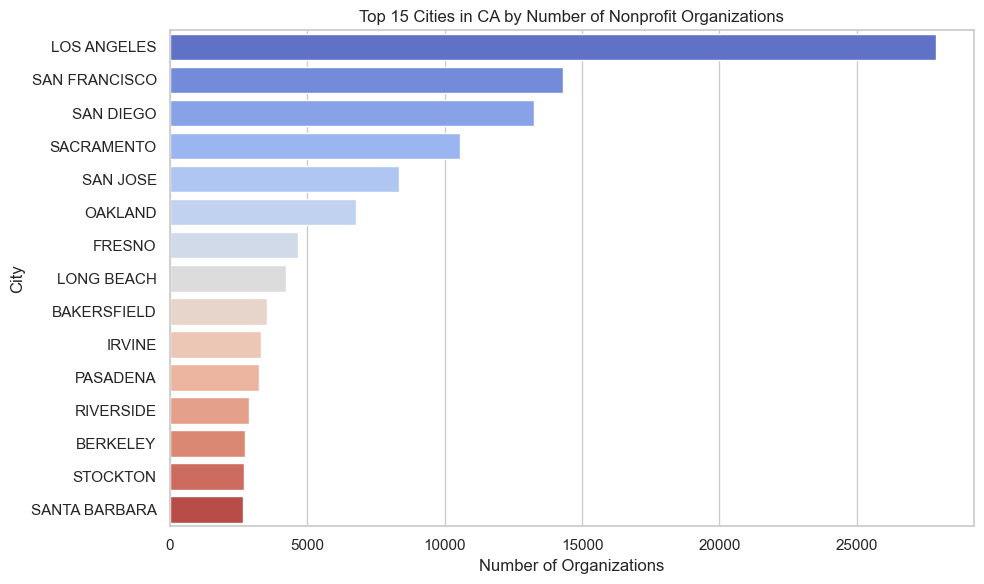

In [18]:
# Set plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_city_state, x='org_count', y='city', palette="coolwarm")

# Add title with state name
plt.title(f"Top 15 Cities in {target_state} by Number of Nonprofit Organizations")
plt.xlabel("Number of Organizations")
plt.ylabel("City")
plt.tight_layout()
plt.show()



**Key Inference**:  
Los Angeles has the highest number of nonprofits in California, followed by San Francisco and San Diego. Mid-sized cities like Sacramento and San Jose also show significant nonprofit presence, while smaller cities like Berkeley and Santa Barbara demonstrate strong per-capita representation.


### Average Revenue vs. Assets by Top-Level Nonprofit Category

This visualization helps identify which categories are wealthiest by comparing their average revenue and assets side by side. It compares the average total revenue and average total assets of nonprofit organizations across different NTEE Level 1 categories.

The plot highlights financial scale and stability among nonprofit sectors by presenting how much revenue organizations bring in and how many assets they hold, grouped by their broad organizational type (e.g., 501C3 CHARITY, 501CX NONPROFIT).

In [19]:
# SQL query to get average revenue and assets by top-level category
query = """
    SELECT nccs_level_1_category,
           AVG(total_revenue) AS avg_revenue,
           AVG(total_assets) AS avg_assets
    FROM nccs_bmf
    WHERE total_revenue IS NOT NULL AND total_assets IS NOT NULL
          AND nccs_level_1_category IS NOT NULL
    GROUP BY nccs_level_1_category
    ORDER BY avg_revenue DESC
    LIMIT 15;
"""
df_financials = pd.read_sql(query, engine)

# Preview the results
df_financials.head(10)


,nccs_level_1_category,avg_revenue,avg_assets
0,501C3 CHARITY,2.883985e+06,5.601252e+06
1,501CX NONPROFIT,1.790795e+06,6.503112e+06
2,UNDEFINED,4.124540e+05,1.757003e+06
3,501C3 PRIVATE FOUNDATION,3.274552e+05,1.156976e+06


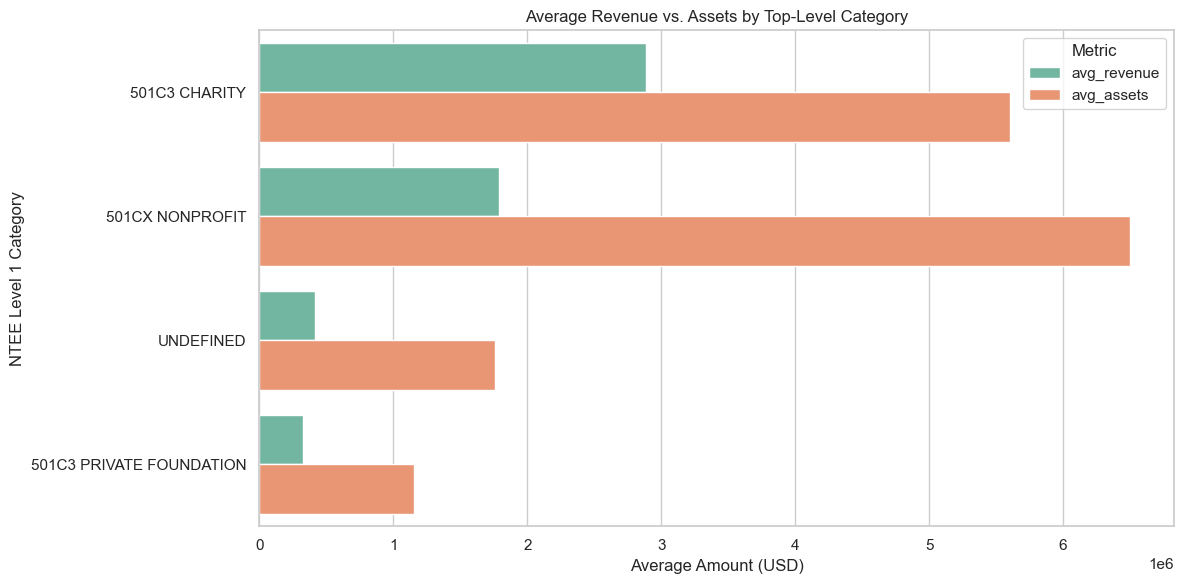

In [20]:
# Set plot style
sns.set(style="whitegrid")

# Reshape the data for seaborn
df_melted = df_financials.melt(id_vars='nccs_level_1_category',
                                value_vars=['avg_revenue', 'avg_assets'],
                                var_name='Metric', value_name='Amount')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted,
            x='Amount', y='nccs_level_1_category', hue='Metric', palette='Set2')

# Add titles and labels
plt.title("Average Revenue vs. Assets by Top-Level Category")
plt.xlabel("Average Amount (USD)")
plt.ylabel("NTEE Level 1 Category")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


**Key Inference**:  
501C3 and 501CX organizations hold the highest average assets, indicating stronger financial foundations. In most categories, average assets are significantly higher than revenue, suggesting that nonprofits tend to accumulate or retain value. The 'UNDEFINED' group may reflect incomplete or ambiguous IRS classifications and should be interpreted cautiously.


#### Distribution of Total Revenue by Category (Log Scale)

This boxplot provides a deeper look into the financial characteristics of nonprofits by showing how total revenue is distributed within each NTEE Level 1 category.

Unlike the earlier average-based comparison, this visualization displays the full spread of revenue values for each category — including medians, quartiles, and outliers — using a logarithmic scale to handle the wide variation in revenue figures.


In [21]:
# SQL query to fetch raw revenue and assets for categories with sufficient data
query = """
    SELECT nccs_level_1_category, total_revenue, total_assets
    FROM nccs_bmf
    WHERE nccs_level_1_category IS NOT NULL
      AND total_revenue IS NOT NULL AND total_assets IS NOT NULL
      AND total_revenue > 0 AND total_assets > 0
    LIMIT 50000;  -- Sample size for performance (adjust as needed)
"""
df_box = pd.read_sql(query, engine)

# Preview data
df_box.head()


,nccs_level_1_category,total_revenue,total_assets
0,501C3 CHARITY,22893.0,4226.0
1,501C3 CHARITY,53519.0,64699.0
2,501C3 CHARITY,12657777.0,9236818.0
3,501C3 CHARITY,806556.0,2248214.0
4,501C3 CHARITY,35000.0,21343.0


#### Boxplot (Log Scale) – Total Revenue by Category

/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/2084870752.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='total_revenue', y='nccs_level_1_category',


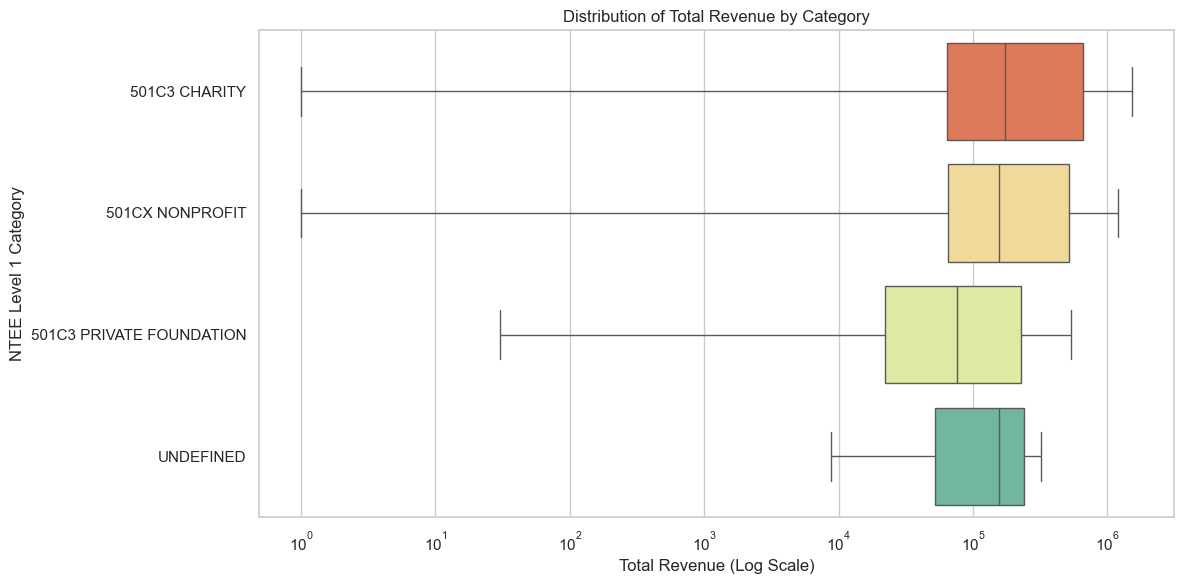

In [22]:
# Set style
sns.set(style="whitegrid")

# Boxplot for total revenue (log scale)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box, x='total_revenue', y='nccs_level_1_category',
            showfliers=False, palette="Spectral")

plt.xscale("log")
plt.xlabel("Total Revenue (Log Scale)")
plt.ylabel("NTEE Level 1 Category")
plt.title("Distribution of Total Revenue by Category")
plt.tight_layout()
plt.show()


**Key Inference**:  
501C3 and 501CX categories exhibit wide variance in revenue, with a long tail of high-revenue organizations. The log scale reveals that most nonprofits operate on modest budgets, while a smaller number command disproportionately large revenues. This reinforces the notion that financial size among nonprofits is highly skewed.

#### Distribution of Total Assets by Category (Log Scale)

This boxplot explores the distribution of total assets held by nonprofit organizations within each NTEE Level 1 category, using a log scale for visibility across magnitudes.
 
By displaying medians, interquartile ranges, and outliers, this plot reveals the financial depth and variability of asset holdings in different nonprofit sectors. It complements the revenue boxplot and helps assess long-term stability or endowment patterns.


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/2805421203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='total_assets', y='nccs_level_1_category',


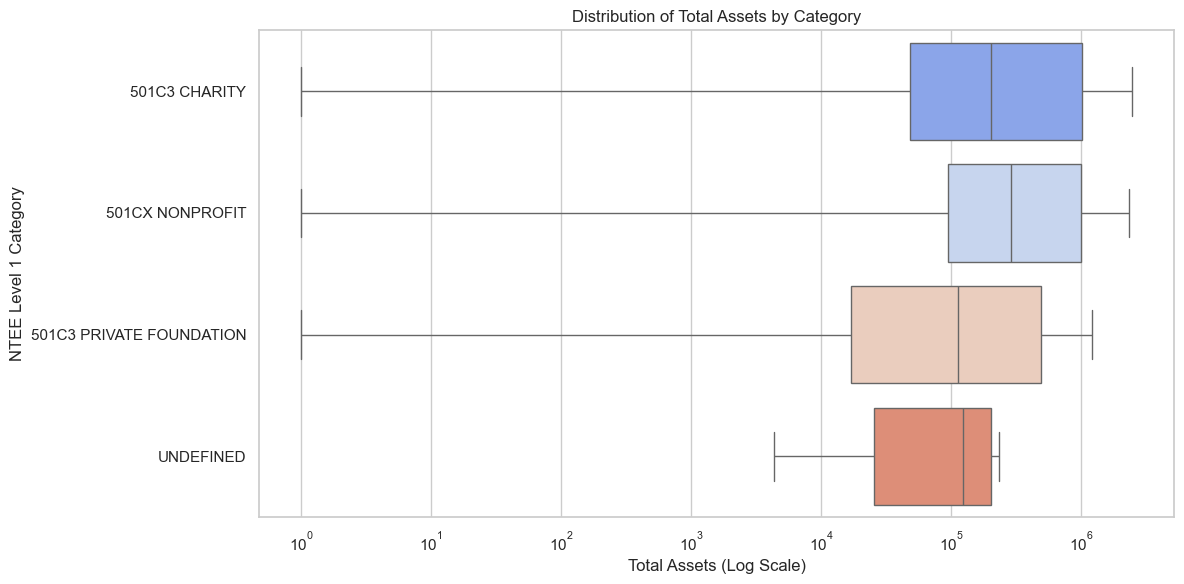

In [23]:
# Boxplot for total assets (log scale)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box, x='total_assets', y='nccs_level_1_category',
            showfliers=False, palette="coolwarm")

plt.xscale("log")
plt.xlabel("Total Assets (Log Scale)")
plt.ylabel("NTEE Level 1 Category")
plt.title("Distribution of Total Assets by Category")
plt.tight_layout()
plt.show()


**Key Inference**:  
501C3 CHARITY and 501CX NONPROFIT organizations have significantly larger and more variable asset distributions, suggesting the presence of well-capitalized institutions in these categories. Private foundations exhibit tighter clustering and slightly lower medians, consistent with targeted, often family- or grant-backed entities.

#### Revenue Distribution (Selected Categories)

This boxplot isolates the distribution of total revenue within a user-defined subset of NTEE Level 1 categories, using a log scale to accommodate skew.

By filtering on specific categories (e.g., 501C3 CHARITY, 501C4 SOCIAL WELFARE, 501C6 BUSINESS LEAGUES), this visualization enables focused financial comparisons between nonprofit types of interest. It provides the flexibility to adapt the plot dynamically for any set of categories.


In [24]:
# Define the categories you want to include
selected_categories = ['501C3 CHARITY', '501C4 SOCIAL WELFARE', '501C6 BUSINESS LEAGUES']

# Format for SQL IN clause
formatted_list = ",".join(f"'{cat}'" for cat in selected_categories)

# SQL query
query = f"""
    SELECT nccs_level_1_category, total_revenue, total_assets
    FROM nccs_bmf
    WHERE nccs_level_1_category IN ({formatted_list})
      AND total_revenue IS NOT NULL AND total_assets IS NOT NULL
      AND total_revenue > 0 AND total_assets > 0
    LIMIT 30000;
"""
df_filtered = pd.read_sql(query, engine)

# Preview
df_filtered.head()


,nccs_level_1_category,total_revenue,total_assets
0,501C3 CHARITY,22893.0,4226.0
1,501C3 CHARITY,53519.0,64699.0
2,501C3 CHARITY,12657777.0,9236818.0
3,501C3 CHARITY,806556.0,2248214.0
4,501C3 CHARITY,35000.0,21343.0


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/2830197696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='total_revenue', y='nccs_level_1_category',


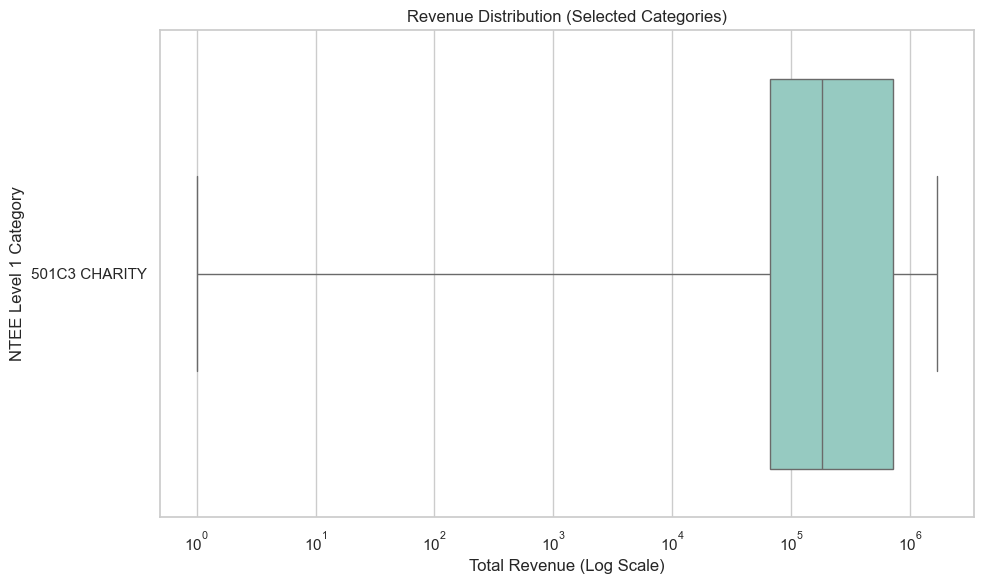

In [25]:
# Boxplot for revenue (log scale) for selected categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='total_revenue', y='nccs_level_1_category',
            showfliers=False, palette="Set3")

plt.xscale("log")
plt.xlabel("Total Revenue (Log Scale)")
plt.ylabel("NTEE Level 1 Category")
plt.title("Revenue Distribution (Selected Categories)")
plt.tight_layout()
plt.show()


**Key Inference**:  
501C3 CHARITY organizations show a wide spread of revenue values, reflecting their scale diversity — from small community nonprofits to large institutional charities. The inclusion of a category filter enables domain-specific benchmarking and drill-downs for more granular analysis.

#### Asset Distribution (Selected Categories)

This boxplot visualizes the distribution of total assets among nonprofits within a user-specified subset of NTEE Level 1 categories. A log scale is used to accommodate large variations in organizational wealth.

By filtering on selected categories (e.g., 501C3 CHARITY), this view enables focused financial comparison of asset holdings. It complements the revenue distribution plot and supports domain-specific analysis of organizational capital.


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/3602294048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='total_assets', y='nccs_level_1_category',


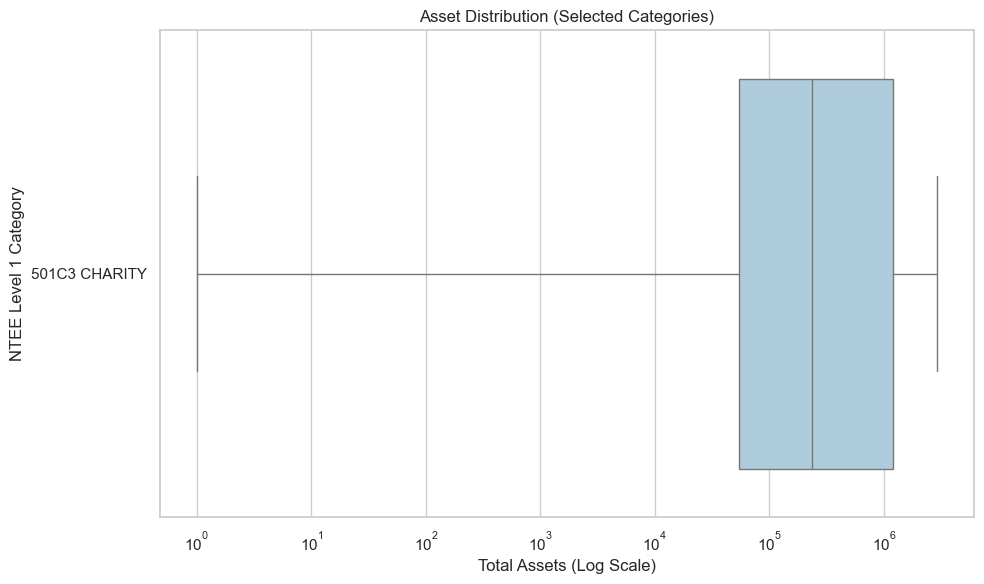

In [26]:
# Boxplot for assets (log scale) for selected categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='total_assets', y='nccs_level_1_category',
            showfliers=False, palette="Paired")

plt.xscale("log")
plt.xlabel("Total Assets (Log Scale)")
plt.ylabel("NTEE Level 1 Category")
plt.title("Asset Distribution (Selected Categories)")
plt.tight_layout()
plt.show()


**Key Inference**:  
501C3 CHARITY organizations show wide variability in asset levels, ranging from asset-light community organizations to large institutions with substantial reserves. The long tail of high-asset outliers emphasizes how financial scale is highly uneven, even within the same regulatory classification.

### Private Foundation Filing Requirement Status

This pie chart illustrates the distribution of nonprofit organizations based on whether they are required to file as private foundations, excluding those with undefined status.

The chart categorizes organizations into four filing statuses—No Filing Required, Filing Required, Conditional Filing, and Special Case—based on IRS codes. Undefined entries have been excluded for clarity. This classification helps distinguish between public charities and private foundations, each of which has different regulatory and reporting requirements.

In [27]:
# SQL query to count organizations by private foundation filing requirement
query = """
    SELECT 
        bmf_private_foundation_filing_required,
        COUNT(*) AS org_count
    FROM nccs_bmf
    GROUP BY bmf_private_foundation_filing_required
    ORDER BY org_count DESC;
"""
df_foundation = pd.read_sql(query, engine)

# Fill NULLs with a label for clarity
df_foundation['bmf_private_foundation_filing_required'] = df_foundation['bmf_private_foundation_filing_required'].fillna("Unknown")

# Preview
df_foundation.head()


,bmf_private_foundation_filing_required,org_count
0,0.0,1792936
1,Unknown,1493434
2,1.0,150334
3,3.0,237
4,2.0,21


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/4278201141.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foundation_clean['label'] = df_foundation_clean['bmf_private_foundation_filing_required'].astype(int).map(foundation_labels)


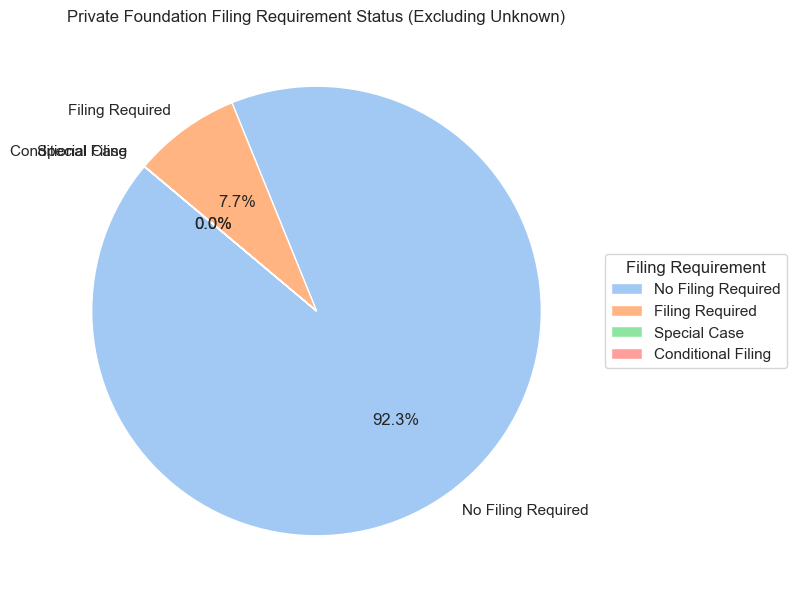

In [86]:
# Step 1: Replace NULLs with "Unknown"
df_foundation['bmf_private_foundation_filing_required'] = df_foundation[
    'bmf_private_foundation_filing_required'
].fillna("Unknown")

# Step 2: Filter out "Unknown"
df_foundation_clean = df_foundation[df_foundation['bmf_private_foundation_filing_required'] != "Unknown"]

# Step 3: Create readable labels for legend
foundation_labels = {
    0: "No Filing Required",
    1: "Filing Required",
    2: "Conditional Filing",
    3: "Special Case"
}
df_foundation_clean['label'] = df_foundation_clean['bmf_private_foundation_filing_required'].astype(int).map(foundation_labels)

# Step 4: Plot the cleaned pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(df_foundation_clean['org_count'],
                                   labels=df_foundation_clean['label'],
                                   autopct='%1.1f%%',
                                   startangle=140,
                                   colors=sns.color_palette("pastel"))

plt.title("Private Foundation Filing Requirement Status (Excluding Unknown)")
plt.legend(wedges, df_foundation_clean['label'], title="Filing Requirement", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


**Key Inference**:  
The vast majority of organizations are classified as not requiring private foundation filings, consistent with their likely designation as public charities. A small fraction falls under special or conditional filing categories, indicating more complex or narrowly defined organizational structures.


### Private Foundation Filing Status by Category

Let's cross-tab private foundation filing status with top-level nonprofit category (nccs_level_1_category). This helps reveal which types of organizations are more likely to be private foundations or exempt. This stacked horizontal bar chart shows the distribution of private foundation filing requirements across the nonprofit categories.

The chart combines NTEE Level 1 categories with IRS filing requirement codes to provide insight into how different types of nonprofits are regulated. Filing status values (e.g., "Filing Required", "No Filing Required", "Special Case") are color-coded in the legend for clarity. The visualization includes unknowns but distinguishes them from explicitly defined statuses.



In [29]:
# SQL query: count combinations of category and filing requirement
query = """
    SELECT 
        nccs_level_1_category,
        bmf_private_foundation_filing_required,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE nccs_level_1_category IS NOT NULL
    GROUP BY nccs_level_1_category, bmf_private_foundation_filing_required
    ORDER BY org_count DESC;
"""
df_cross = pd.read_sql(query, engine)

# Fill NULLs
df_cross['bmf_private_foundation_filing_required'] = df_cross['bmf_private_foundation_filing_required'].fillna("Unknown")


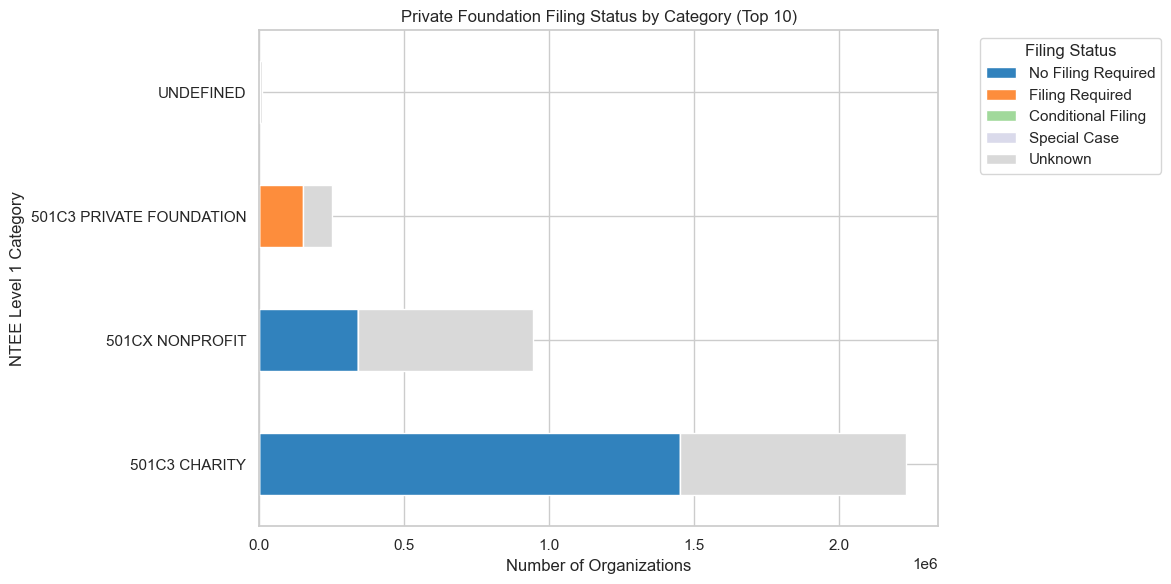

In [87]:
# Step 1: Mapping codes to descriptive labels
filing_labels = {
    0: "No Filing Required",
    1: "Filing Required",
    2: "Conditional Filing",
    3: "Special Case",
    "Unknown": "Unknown"
}

# Apply mapping to the columns
pivot_df.columns = [filing_labels.get(col, str(col)) for col in pivot_df.columns]

# Step 2: Plot with updated legend
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='tab20c')

plt.title("Private Foundation Filing Status by Category (Top 10)")
plt.xlabel("Number of Organizations")
plt.ylabel("NTEE Level 1 Category")
plt.legend(title="Filing Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Key Inference**:  
Most 501C3 CHARITY and 501CX NONPROFIT organizations are exempt from private foundation filing, consistent with their classification as public charities. 501C3 PRIVATE FOUNDATION orgs, on the other hand, have a significantly higher proportion of mandatory filing. This pattern reflects the legal distinctions between broad public-serving charities and narrower, donor-controlled foundations.

### 🗺️ Private Foundation Filing Status by State (Top 10)

Let’s cross-tabulate private foundation filing requirement by state, so we can see how filing behavior varies geographically. This stacked bar chart visualizes how private foundation filing requirements vary across the top 10 U.S. states by nonprofit volume.

Each bar represents a state and is segmented by filing requirement status: No Filing Required, Filing Required, Conditional Filing, Special Case, and Unknown. The chart highlights geographic variation in nonprofit regulatory classification and allows comparison of reporting obligations across high-volume states.

In [31]:
# SQL query to count combinations of state and filing requirement
query = """
    SELECT 
        state,
        bmf_private_foundation_filing_required,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE state IS NOT NULL
    GROUP BY state, bmf_private_foundation_filing_required
    ORDER BY org_count DESC;
"""
df_cross_state = pd.read_sql(query, engine)

# Fill NULLs for status
df_cross_state['bmf_private_foundation_filing_required'] = df_cross_state['bmf_private_foundation_filing_required'].fillna("Unknown")


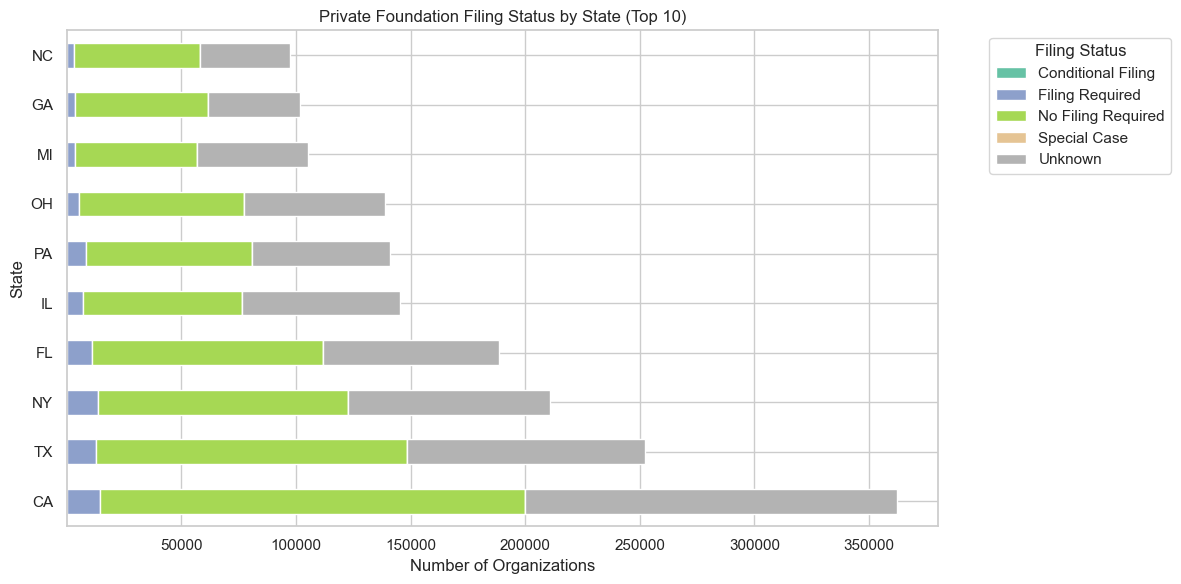

In [88]:
# Step 1: Define descriptive labels
filing_labels = {
    0: "No Filing Required",
    1: "Filing Required",
    2: "Conditional Filing",
    3: "Special Case",
    "Unknown": "Unknown"
}

# Step 2: Map numeric codes to labels
df_cross_state['label'] = df_cross_state['bmf_private_foundation_filing_required'].apply(
    lambda x: filing_labels.get(x, str(x))
)

# Step 3: Pivot the data
pivot_state = df_cross_state.pivot(index='state', columns='label', values='org_count').fillna(0)

# Step 4: Select top 10 states
top_states = pivot_state.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_state = pivot_state.loc[top_states]

# Step 5: Plot with legend
ax = pivot_state.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='Set2')

plt.title("Private Foundation Filing Status by State (Top 10)")
plt.xlabel("Number of Organizations")
plt.ylabel("State")
plt.legend(title="Filing Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Key Inference**:  
California, Texas, and New York have the highest number of nonprofits, but also a disproportionately large share of organizations with unknown filing status. States like Illinois and Pennsylvania show clearer filing trends, with most nonprofits classified as not requiring foundation-level filings. This chart emphasizes the need for improved data completeness and state-specific compliance analysis.

### Organization Count by Deductibility Classification

This horizontal bar chart shows the distribution of nonprofit organizations by their IRS deductibility status, based on the `bmf_deductibility_code` field.

Deductibility codes indicate whether contributions to a nonprofit are tax-deductible for donors. This chart categorizes organizations as “Deductible (Public Charity),” “Not Deductible,” “Deductible by Treaty,” and others—including undefined or unknown classifications. This view helps assess the landscape of donor-beneficial tax structures across the sector.

In [33]:
# SQL query to count number of orgs by deductibility code
query = """
    SELECT 
        bmf_deductibility_code,
        COUNT(*) AS org_count
    FROM nccs_bmf
    GROUP BY bmf_deductibility_code
    ORDER BY org_count DESC;
"""
df_deduct = pd.read_sql(query, engine)

# Replace NULLs for display
df_deduct['bmf_deductibility_code'] = df_deduct['bmf_deductibility_code'].fillna("Unknown")

# Preview
df_deduct.head()


,bmf_deductibility_code,org_count
0,1.0,1657994
1,Unknown,1493434
2,2.0,249894
3,0.0,35088
4,4.0,552


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/422192565.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_deduct, x='org_count', y='label', palette='crest')


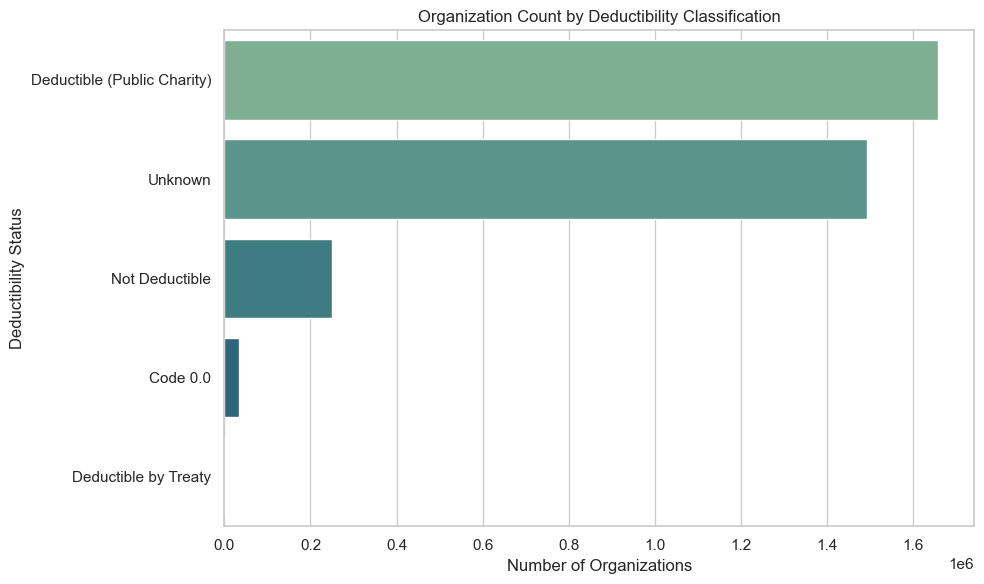

In [35]:
# Mapping codes to human-friendly labels
deduct_map = {
    1: "Deductible (Public Charity)",
    2: "Not Deductible",
    4: "Deductible by Treaty",
    5: "Limited Deductibility",
    6: "Special Rules Apply",
    7: "Check Group Ruling",
    9: "Governmental",
    "Unknown": "Unknown"
}

# Apply mapping
df_deduct['label'] = df_deduct['bmf_deductibility_code'].apply(lambda x: deduct_map.get(x, f"Code {x}"))

# Plot with readable labels
plt.figure(figsize=(10, 6))
sns.barplot(data=df_deduct, x='org_count', y='label', palette='crest')

plt.title("Organization Count by Deductibility Classification")
plt.xlabel("Number of Organizations")
plt.ylabel("Deductibility Status")
plt.tight_layout()
plt.show()


**Key Inference**:  
A large proportion of organizations are designated as “Deductible,” aligning with their public charity status. However, a significant number fall under the “Unknown” category, which may reflect data gaps or incomplete IRS filings. The remaining organizations include entities that are not donor-deductible or fall under special rules (e.g., foreign treaties or government units).

let’s visualize the distribution of nonprofits based on their deductibility status, using the column bmf_deductibility_code.

#### Deductibility Classification by Category

This stacked bar chart provides a breakdown of IRS deductibility codes across the top 10 NTEE Level 1 nonprofit categories.

Each category is segmented by deductibility status—such as “Deductible (Public Charity),” “Not Deductible,” “Deductible by Treaty,” and “Unknown.” This chart builds on the previous summary view by showing how deductibility patterns differ by organizational type, offering a deeper lens into donor-benefit eligibility and compliance trends.




In [36]:
# SQL query to count combinations of category and deductibility code
query = """
    SELECT 
        nccs_level_1_category,
        bmf_deductibility_code,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE nccs_level_1_category IS NOT NULL
    GROUP BY nccs_level_1_category, bmf_deductibility_code
    ORDER BY org_count DESC;
"""
df_deduct_cat = pd.read_sql(query, engine)

# Fill and map codes
deduct_map = {
    1: "Deductible (Public Charity)",
    2: "Not Deductible",
    4: "Deductible by Treaty",
    5: "Limited Deductibility",
    6: "Special Rules Apply",
    7: "Check Group Ruling",
    9: "Governmental",
    None: "Unknown"
}
df_deduct_cat['bmf_deductibility_code'] = df_deduct_cat['bmf_deductibility_code'].fillna("Unknown")
df_deduct_cat['label'] = df_deduct_cat['bmf_deductibility_code'].apply(lambda x: deduct_map.get(x, f"Code {x}"))


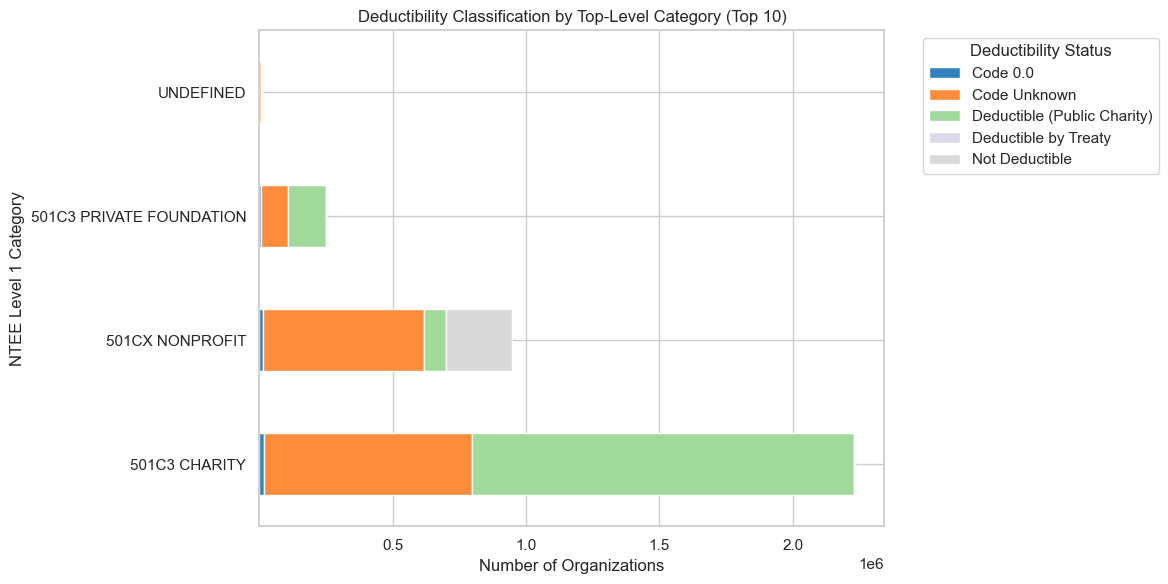

In [37]:
# Pivot and sort top categories
pivot_cat = df_deduct_cat.pivot(index='nccs_level_1_category',
                                 columns='label',
                                 values='org_count').fillna(0)

top_cats = pivot_cat.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_cat = pivot_cat.loc[top_cats]

# Plot
pivot_cat.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='tab20c')

plt.title("Deductibility Classification by Top-Level Category (Top 10)")
plt.xlabel("Number of Organizations")
plt.ylabel("NTEE Level 1 Category")
plt.legend(title="Deductibility Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Key Inference**:  
501C3 CHARITY organizations overwhelmingly qualify for tax-deductible donations, while other types such as 501CX NONPROFIT show a much higher share of undefined or non-deductible classifications. The "UNDEFINED" category contains a large number of records with unknown status, indicating potential gaps in classification or IRS data reporting.

#### Deductibility Classification by State (Top 10)

This stacked bar chart breaks down IRS deductibility codes across the top 10 states by number of nonprofit organizations.

Each state’s nonprofit population is segmented into categories such as “Deductible (Public Charity),” “Not Deductible,” “Deductible by Treaty,” and “Unknown.” This state-level view highlights how donor-benefit eligibility varies across geographic regions.


In [38]:
# SQL query to count combinations of state and deductibility code
query = """
    SELECT 
        state,
        bmf_deductibility_code,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE state IS NOT NULL
    GROUP BY state, bmf_deductibility_code
    ORDER BY org_count DESC;
"""
df_deduct_state = pd.read_sql(query, engine)

# Map and fill labels
df_deduct_state['bmf_deductibility_code'] = df_deduct_state['bmf_deductibility_code'].fillna("Unknown")
df_deduct_state['label'] = df_deduct_state['bmf_deductibility_code'].apply(lambda x: deduct_map.get(x, f"Code {x}"))


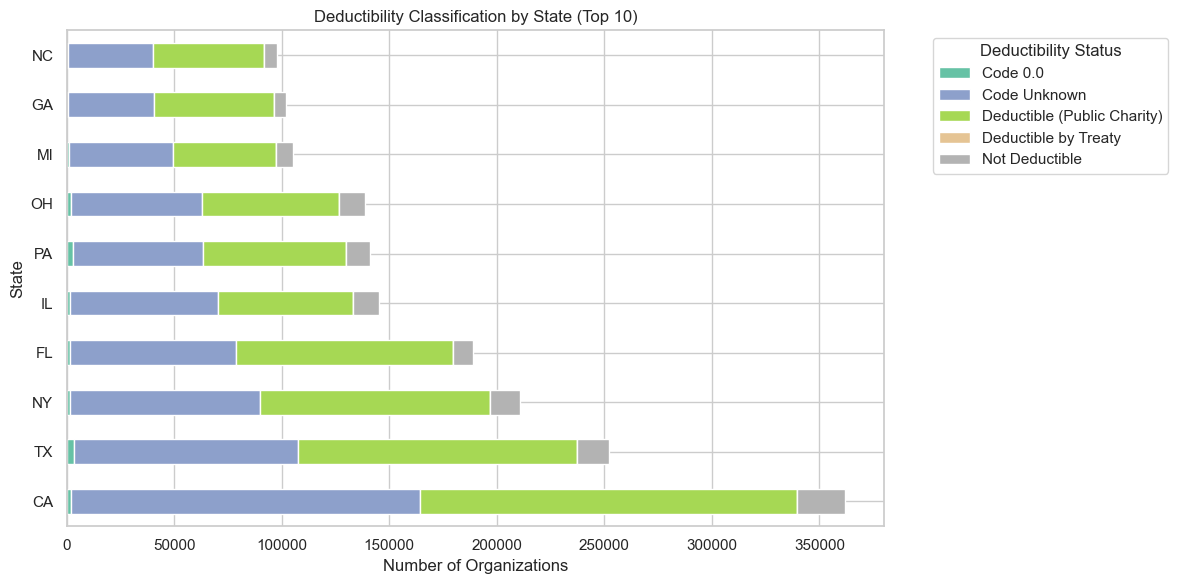

In [39]:
# Pivot and filter top states
pivot_state = df_deduct_state.pivot(index='state',
                                     columns='label',
                                     values='org_count').fillna(0)

top_states = pivot_state.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_state = pivot_state.loc[top_states]

# Plot
pivot_state.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='Set2')

plt.title("Deductibility Classification by State (Top 10)")
plt.xlabel("Number of Organizations")
plt.ylabel("State")
plt.legend(title="Deductibility Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Key Inference**:  
California and Texas lead in total nonprofit volume, with a large portion classified as publicly deductible. However, several states—including Florida and New York—have a considerable share of organizations with undefined deductibility status, suggesting a need for more complete or updated classification. This breakdown can help inform both regional tax policy evaluation and IRS reporting coverage.

### Distribution of Nonprofit Lifespan (Years Active)

This histogram with a kernel density estimate (KDE) line shows how long nonprofit organizations remain active, measured as the number of years between their recorded start and end dates.

The lifespan of each organization is calculated from `organization_first_year` and `organization_last_year`. The histogram reveals how many nonprofits fall into different longevity brackets, while the KDE line helps visualize the overall distribution shape.

In [41]:
query = """
    SELECT 
        TIMESTAMPDIFF(YEAR, organization_first_year, organization_last_year) AS org_lifespan
    FROM nccs_bmf
    WHERE organization_first_year IS NOT NULL
      AND organization_last_year IS NOT NULL
      AND organization_last_year >= organization_first_year
    LIMIT 50000;
"""
df_lifespan = pd.read_sql(query, engine)
df_lifespan.head()


,org_lifespan
0,5
1,35
2,29
3,29
4,29


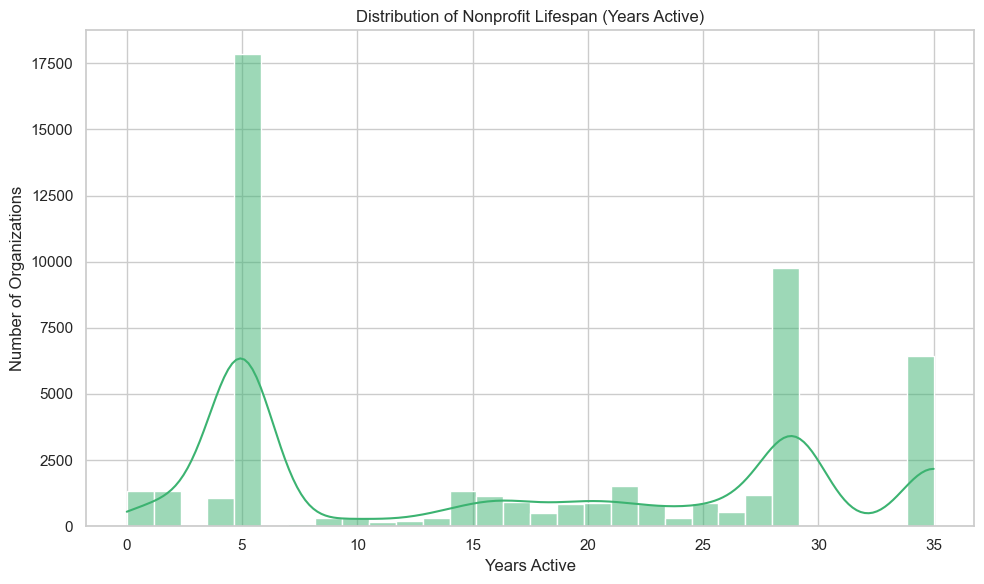

In [42]:
# Plot distribution of calculated lifespans
plt.figure(figsize=(10, 6))
sns.histplot(data=df_lifespan,
             x='org_lifespan',
             bins=30,
             kde=True,
             color='mediumseagreen')

plt.title("Distribution of Nonprofit Lifespan (Years Active)")
plt.xlabel("Years Active")
plt.ylabel("Number of Organizations")
plt.tight_layout()
plt.show()


**Key Inference**:  
Most nonprofits either exit early (within the first five years) or persist for decades. The sharp spike around the 5-year mark may indicate common organizational failure points or IRS review thresholds. Smaller peaks at longer durations reflect the staying power of large, well-established institutions.


#### Nonprofit Lifespan by NTEE Level 1 Category

This boxplot compares the distribution of organizational lifespan (in years active) across major nonprofit categories.

Lifespan is calculated from `organization_first_year` and `organization_last_year`, and grouped by `nccs_level_1_category`. The plot helps uncover how longevity patterns differ across broad organizational types such as 501C3 charities, private foundations, and general nonprofits.

In [43]:
# Query to calculate lifespan and pull categorical variables
query = """
    SELECT 
        TIMESTAMPDIFF(YEAR, organization_first_year, organization_last_year) AS org_lifespan,
        nccs_level_1_category,
        state,
        bmf_private_foundation_filing_required
    FROM nccs_bmf
    WHERE organization_first_year IS NOT NULL
      AND organization_last_year IS NOT NULL
      AND organization_last_year >= organization_first_year
      AND TIMESTAMPDIFF(YEAR, organization_first_year, organization_last_year) BETWEEN 0 AND 100
    LIMIT 50000;
"""
df_lifespan_full = pd.read_sql(query, engine)

# Fill in missing labels
df_lifespan_full['bmf_private_foundation_filing_required'] = df_lifespan_full['bmf_private_foundation_filing_required'].fillna("Unknown")


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/1141915780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_lifespan_full,


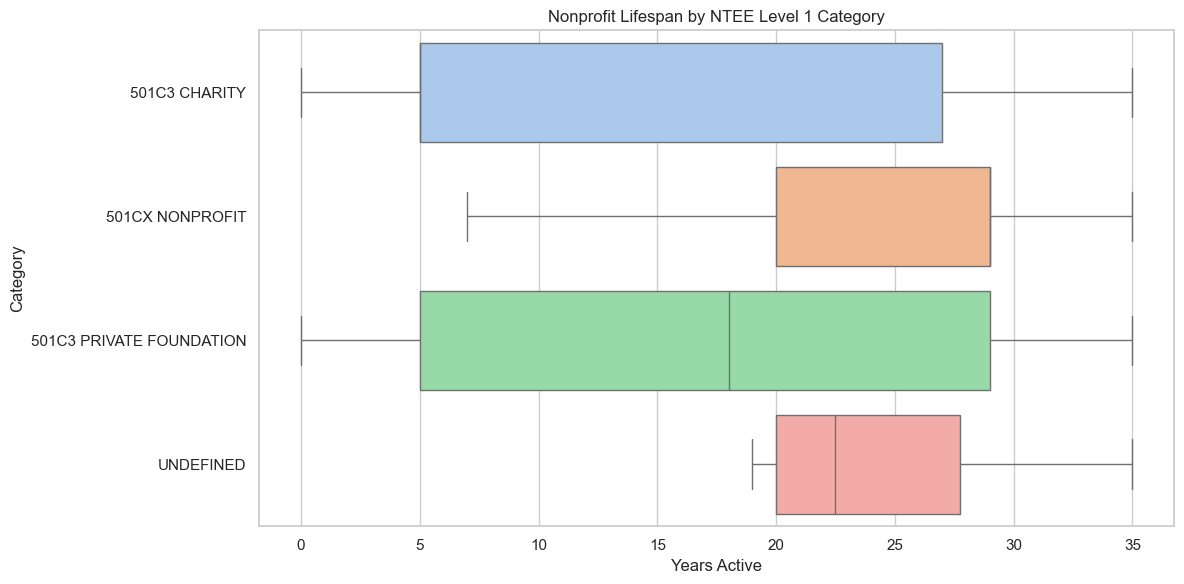

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_lifespan_full,
            x='org_lifespan',
            y='nccs_level_1_category',
            showfliers=False,
            palette='pastel')

plt.title("Nonprofit Lifespan by NTEE Level 1 Category")
plt.xlabel("Years Active")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


**Key Inference**:  
501C3 PRIVATE FOUNDATIONS tend to have the longest operational lifespans on average, with wide variation. 501C3 CHARITY organizations also demonstrate strong median longevity. The 501CX NONPROFIT and UNDEFINED categories show more variability and shorter lifespan distributions overall, which may suggest different regulatory or operational challenges.


#### Nonprofit Lifespan by State (Top 10)

This boxplot shows how nonprofit organization lifespans vary across the top 10 states by organization count.

Using `organization_first_year` and `organization_last_year`, we calculated the active lifespan of nonprofits and grouped them by state. The visualization reveals median lifespans, interquartile ranges, and outliers for each state, allowing for geographic comparisons in organizational longevity.


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/1017655817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_states,


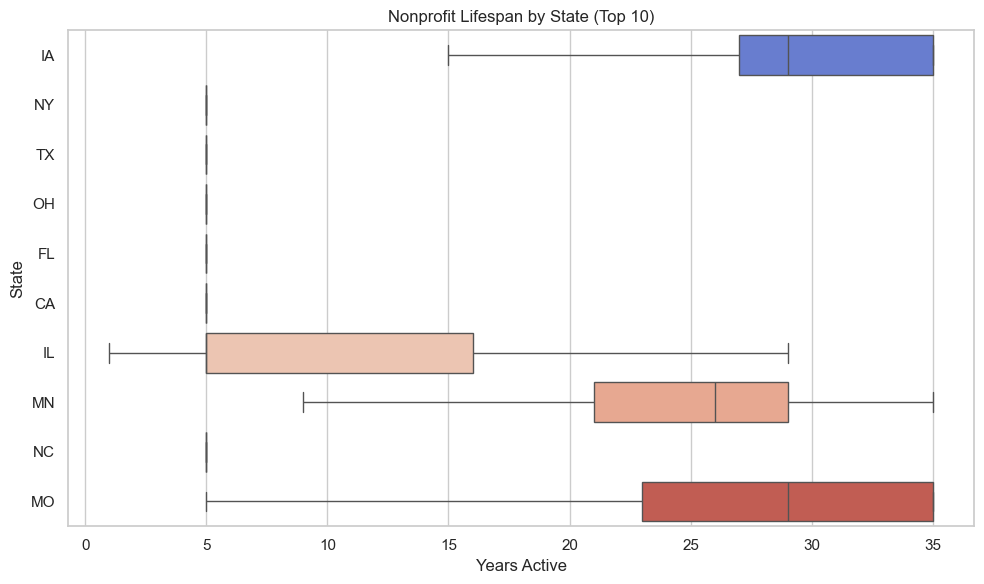

In [45]:
# Focus on top 10 states by total orgs
top_states = df_lifespan_full['state'].value_counts().head(10).index
df_top_states = df_lifespan_full[df_lifespan_full['state'].isin(top_states)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_states,
            x='org_lifespan',
            y='state',
            showfliers=False,
            palette='coolwarm')

plt.title("Nonprofit Lifespan by State (Top 10)")
plt.xlabel("Years Active")
plt.ylabel("State")
plt.tight_layout()
plt.show()


**Key Inference**:  
States like **IA (Iowa)** and **MO (Missouri)** exhibit longer median lifespans among nonprofits, suggesting higher long-term retention or a history of more stable organizations. On the other hand, states such as **FL (Florida)** and **CA (California)** have a broader range and shorter medians, potentially reflecting more turnover or newer organization ecosystems.

#### Boxplot – Lifespan by Foundation Filing Requirement

MAYBE REMOVE

/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/2936333161.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_lifespan_full,


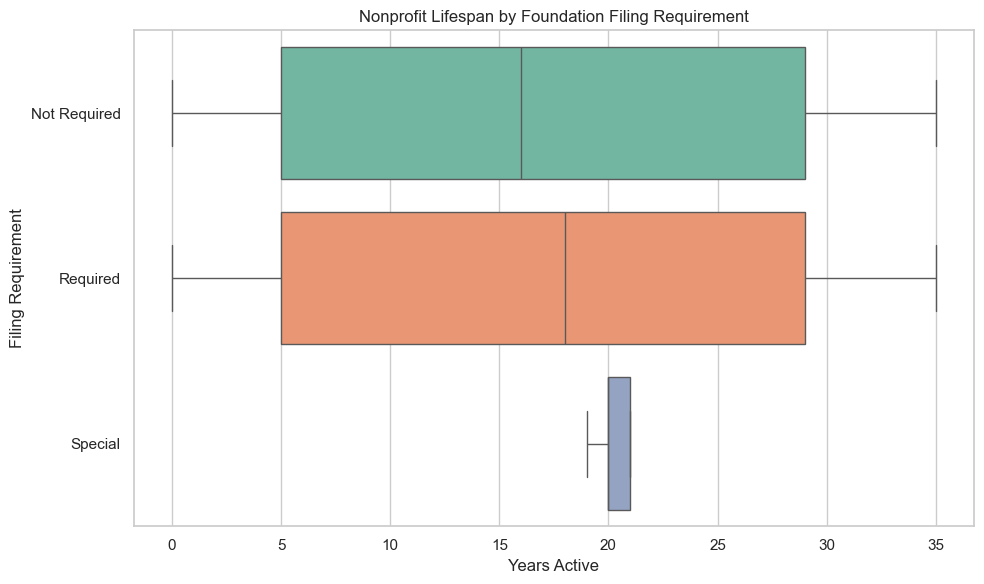

In [46]:
# Format labels
foundation_labels = {
    0: "Not Required",
    1: "Required",
    2: "Conditional",
    3: "Special",
    "Unknown": "Unknown"
}
df_lifespan_full['foundation_label'] = df_lifespan_full['bmf_private_foundation_filing_required'].apply(
    lambda x: foundation_labels.get(x, f"Code {x}")
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_lifespan_full,
            x='org_lifespan',
            y='foundation_label',
            showfliers=False,
            palette='Set2')

plt.title("Nonprofit Lifespan by Foundation Filing Requirement")
plt.xlabel("Years Active")
plt.ylabel("Filing Requirement")
plt.tight_layout()
plt.show()


### Nonprofit Registrations by State and Year

This standalone heatmap provides a temporal and geographical view of nonprofit organization registrations across U.S. states from 2000 to 2024.

We grouped data by `state` and the IRS `ruling_year` (extracted from `organization_ruling_date`) to count the number of nonprofit organizations recognized each year. The heatmap highlights these counts, where darker colors represent higher concentrations of registrations.


In [47]:
query = """
    SELECT 
        state,
        YEAR(organization_ruling_date) AS ruling_year,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE state IS NOT NULL
      AND organization_ruling_date IS NOT NULL
    GROUP BY state, ruling_year
    ORDER BY ruling_year, state;
"""
df_state_year = pd.read_sql(query, engine)

# Preview
df_state_year.head()


,state,ruling_year,org_count
0,AL,1900,8
1,AR,1900,1
2,AZ,1900,3
3,CA,1900,22
4,CT,1900,2


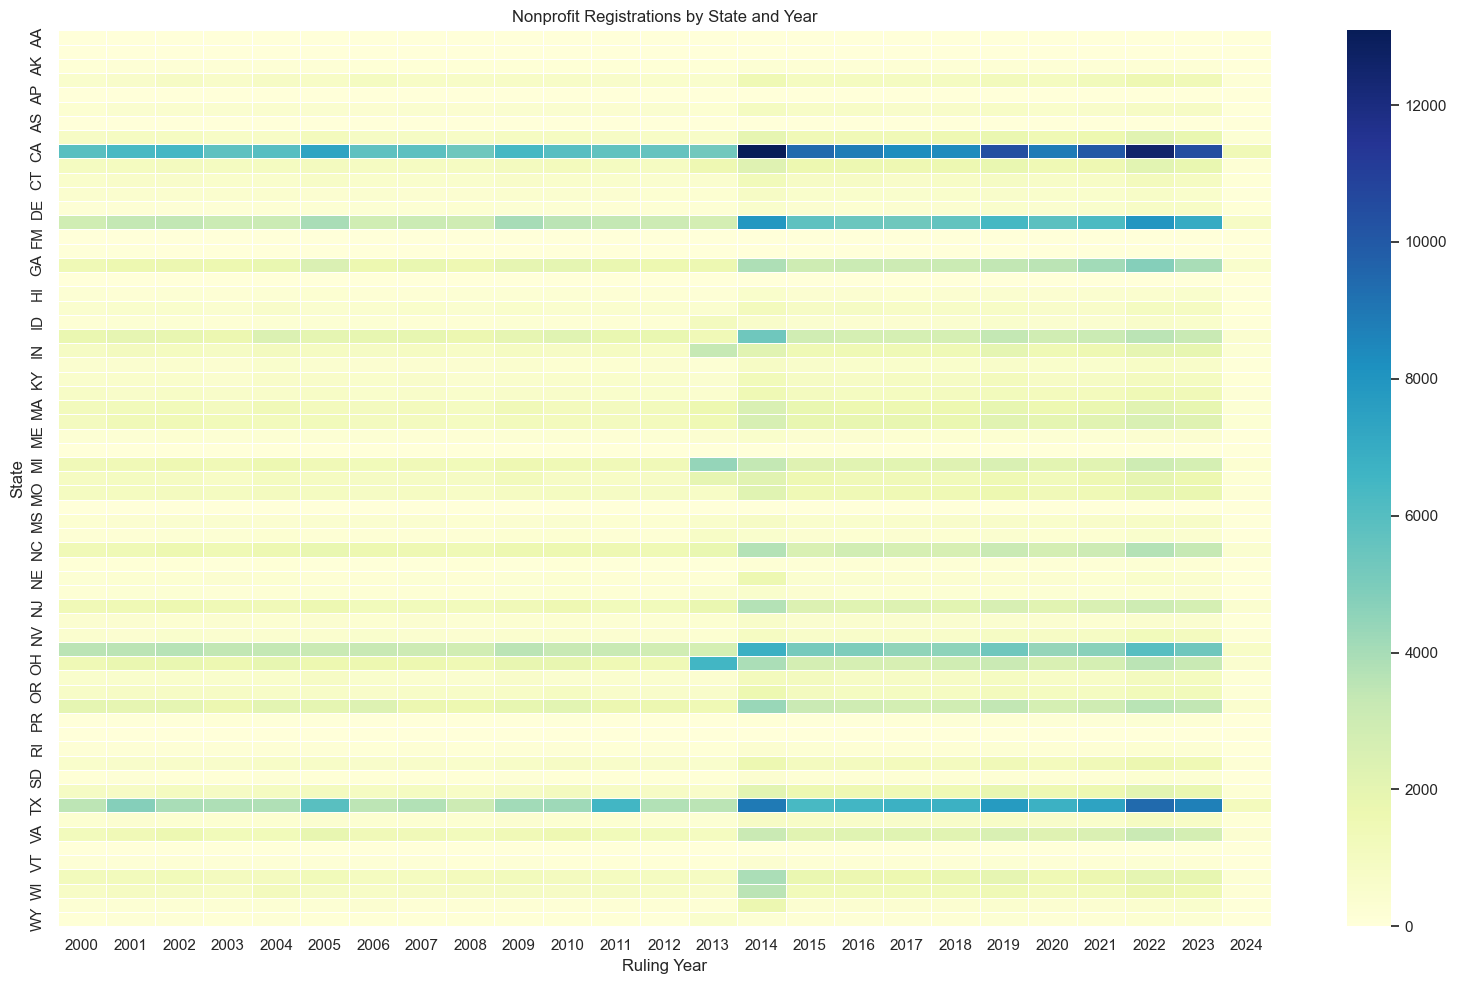

In [48]:
# Pivot for heatmap: rows = state, columns = year
heatmap_df = df_state_year.pivot(index="state", columns="ruling_year", values="org_count").fillna(0)

# Focus on recent years only if needed (e.g., last 25)
if heatmap_df.shape[1] > 25:
    heatmap_df = heatmap_df.iloc[:, -25:]

# Plot
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_df, cmap="YlGnBu", linewidths=0.5)

plt.title("Nonprofit Registrations by State and Year")
plt.xlabel("Ruling Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()


**Key Inference**:  
California (CA) and Texas (TX) have seen significantly higher nonprofit registration volumes compared to other states, particularly in the years following 2014. This may reflect changes in policy, economic factors, or administrative processes that spurred formation. States like New York (NY), Florida (FL), and Georgia (GA) also show sustained activity, whereas smaller states exhibit more sporadic or low registration patterns.

This visualization is especially helpful in identifying national or regional surges in nonprofit activity over time.

### Nonprofit Registrations by CBSA and Year

Let’s now create a CBSA (Core-Based Statistical Area) × Year heatmap, which visualizes how nonprofit registrations have changed over time across major metro regions. This standalone heatmap provides a temporal and metropolitan view of nonprofit organization registrations across the top 15 Core-Based Statistical Areas (CBSAs) in the U.S. over the years.

We grouped data by `census_cbsa_name` (representing metro regions) and `ruling_year` (derived from `organization_ruling_date`) to count how many nonprofit organizations were recognized by the IRS in each metro area annually. The heatmap intensity reflects the volume of registrations, with darker colors indicating higher concentrations.

This visualization helps you identify:
- Which metro areas have growing nonprofit sectors
- Which years saw spikes in new org registrations

In [49]:
query = """
    SELECT 
        census_cbsa_name,
        YEAR(organization_ruling_date) AS ruling_year,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE census_cbsa_name IS NOT NULL
      AND organization_ruling_date IS NOT NULL
    GROUP BY census_cbsa_name, ruling_year
    ORDER BY ruling_year, census_cbsa_name;
"""
df_cbsa_year = pd.read_sql(query, engine)

# Preview
df_cbsa_year.head()


,census_cbsa_name,ruling_year,org_count
0,"Albuquerque, NM",1900,3
1,"Alpena, MI",1900,1
2,"Amarillo, TX",1900,1
3,"Atlanta-Sandy Springs-Alpharetta, GA",1900,1
4,"Augusta-Richmond County, GA-SC",1900,1


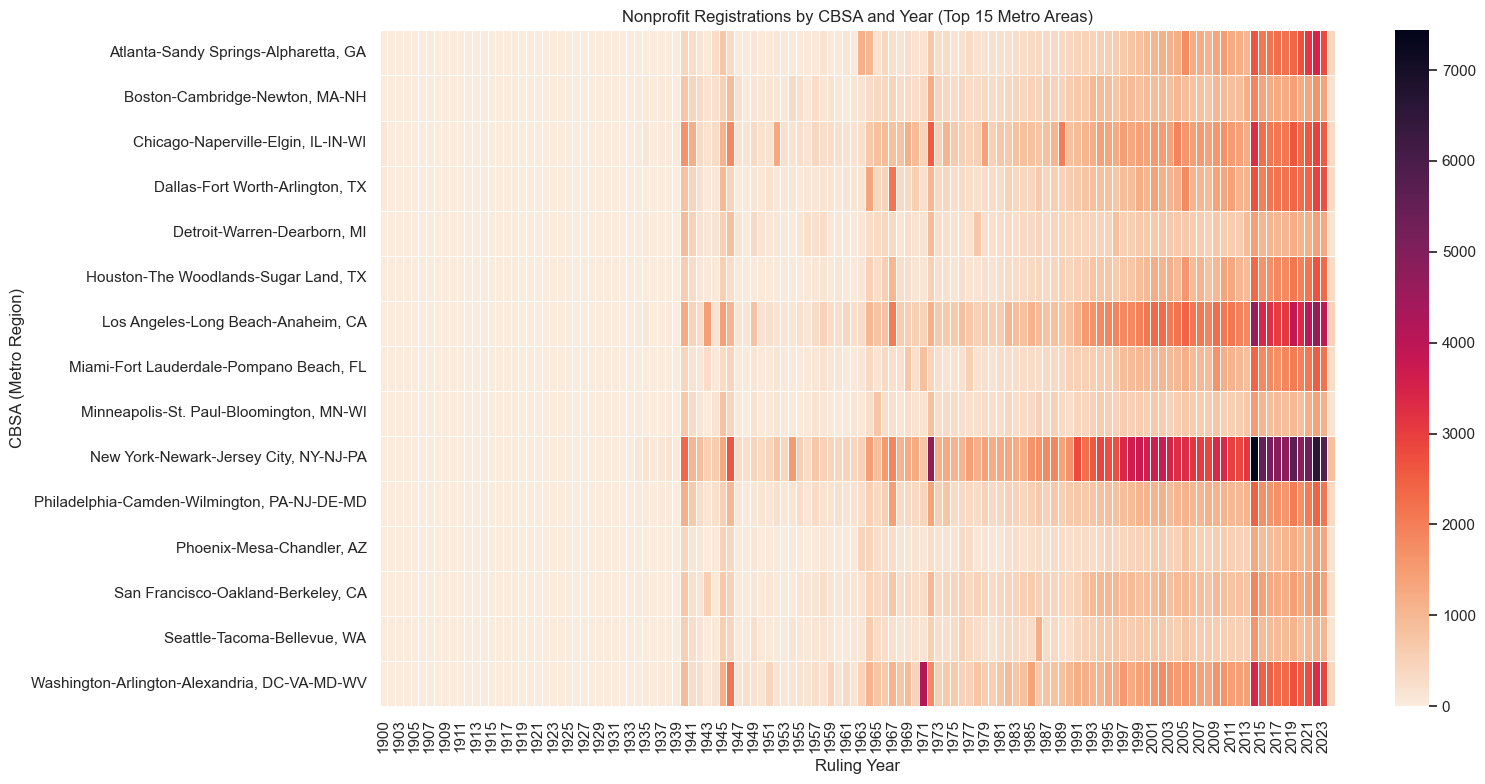

In [50]:
# Focus on top 15 CBSAs by total org count
top_cbsas = df_cbsa_year.groupby('census_cbsa_name')['org_count'].sum().sort_values(ascending=False).head(15).index
df_top_cbsa = df_cbsa_year[df_cbsa_year['census_cbsa_name'].isin(top_cbsas)]

# Pivot
heatmap_cbsa = df_top_cbsa.pivot(index="census_cbsa_name", columns="ruling_year", values="org_count").fillna(0)

# Plot
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_cbsa, cmap="rocket_r", linewidths=0.5)

plt.title("Nonprofit Registrations by CBSA and Year (Top 15 Metro Areas)")
plt.xlabel("Ruling Year")
plt.ylabel("CBSA (Metro Region)")
plt.tight_layout()
plt.show()


**Key Inference**:  
The New York–Newark–Jersey City and Los Angeles–Long Beach–Anaheim metro areas exhibit consistently high nonprofit registration activity, with especially notable peaks between 2014 and 2016. Regions like Miami, Philadelphia, and Houston also show substantial growth, while cities such as Atlanta and Phoenix demonstrate moderate yet steady expansion. This visualization helps highlight urban centers where civic or philanthropic activity may be particularly strong or growing over time.

### Average Income by NTEE Modern Code (Top 20)

This horizontal bar chart ranks the top 20 modern nonprofit categories based on average total income, offering insight into which sectors typically generate the most financial resources.

**Description**:  
The query aggregates organizations by their `ntee_modern_code` and computes the average `total_income` for each category. The result highlights income disparities across specialized domains, focusing on high-revenue sectors. Categories were sorted in descending order of income and visualized using a horizontal bar chart for readability.


In [60]:
modern_code_labels = {
    "MMB-Y33-RG": "Military/Veterans Relief",
    "PSB-R25-RG": "Law Enforcement Support",
    "HEL-E22-PA": "Health Research: Respiratory",
    "HEL-E31-RG": "Health – Group Health",
    "HOS-E21-RG": "Hospitals – General",
    "MMB-Y25-RG": "Military/Veterans Hospitals",
    "IFA-Q38-RG": "International Disaster Relief",
    "MMB-Y30-RG": "Military Welfare Services",
    "UNI-B43-RG": "University Support",
    "ENV-D40-RG": "Pollution Abatement",
    "MMB-Y43-RG": "Military Family Services",
    "HEL-H42-RG": "Health – Vision",
    "HOS-E22-RG": "Hospitals – Specialized",
    "MMB-Y44-RG": "Military Veterans Associations",
    "HEL-E31-NS": "Health – Group Health (NS)",
    "HEL-E80-RG": "Health – Public Health",
    "UNI-B42-RG": "University Systems",
    "HEL-E20-MM": "Health – General and Rehabilitative",
    "PSB-S50-RG": "Public Safety Education",
    "HEL-H81-RG": "Health – Nursing Services"
}


In [61]:
query = """
    SELECT 
        ntee_modern_code,
        AVG(total_income) AS avg_income
    FROM nccs_bmf
    WHERE total_income IS NOT NULL
      AND ntee_modern_code IS NOT NULL
    GROUP BY ntee_modern_code
    ORDER BY avg_income DESC
    LIMIT 20;
"""
df_income_modern = pd.read_sql(query, engine)

# Preview
df_income_modern.head()


,ntee_modern_code,avg_income
0,MMB-Y33-RG,3.345805e+09
1,PSB-R25-RG,2.086947e+08
2,HEL-E22-PA,1.921686e+08
3,HEL-E31-RG,1.388560e+08
4,HOS-E21-RG,1.165644e+08


In [62]:
# Map labels to modern codes
df_income_modern['label'] = df_income_modern['ntee_modern_code'].apply(
    lambda x: modern_code_labels.get(x, x)
)


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/2951925897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_income_modern,


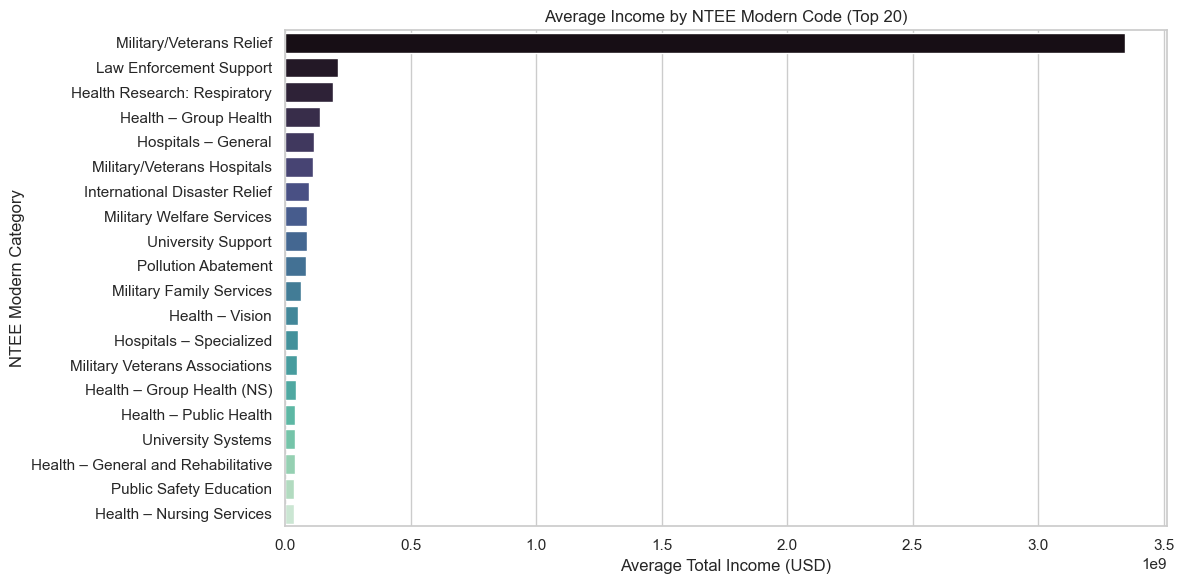

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_income_modern,
            x='avg_income', y='label',
            palette='mako')

plt.title("Average Income by NTEE Modern Code (Top 20)")
plt.xlabel("Average Total Income (USD)")
plt.ylabel("NTEE Modern Category")
plt.tight_layout()
plt.show()


**Key Inference**:  
Sectors related to military and veteran support—such as Military/Veterans Relief, Law Enforcement Support, and Military Hospitals—consistently top the chart, with Military/Veterans Relief averaging over $3 billion in income. Health-related categories like Group Health and Hospitals also feature prominently. These findings suggest that organizations in emergency services, military, and healthcare receive disproportionately high funding or manage large-scale operations.

#### Average Income by Broader Nonprofit Domain

This subplot aggregates average income across broader thematic domains, simplifying the granularity of modern NTEE codes into larger, interpretable groups like Health, Education, and Military.

We grouped individual `ntee_modern_code` categories into broader `domain` classifications (e.g., all military-related categories under "Military") and calculated the average `total_income` per domain. The result is visualized as a horizontal bar chart using the Viridis color palette for perceptual clarity.

In [64]:
modern_code_domains = {
    "MMB-Y33-RG": "Military",
    "PSB-R25-RG": "Public Safety",
    "HEL-E22-PA": "Health",
    "HEL-E31-RG": "Health",
    "HOS-E21-RG": "Health",
    "MMB-Y25-RG": "Military",
    "IFA-Q38-RG": "International",
    "MMB-Y30-RG": "Military",
    "UNI-B43-RG": "Education",
    "ENV-D40-RG": "Environment",
    "MMB-Y43-RG": "Military",
    "HEL-H42-RG": "Health",
    "HOS-E22-RG": "Health",
    "MMB-Y44-RG": "Military",
    "HEL-E31-NS": "Health",
    "HEL-E80-RG": "Health",
    "UNI-B42-RG": "Education",
    "HEL-E20-MM": "Health",
    "PSB-S50-RG": "Public Safety",
    "HEL-H81-RG": "Health"
}


In [65]:
# Add domain group to each row
df_income_modern['domain'] = df_income_modern['ntee_modern_code'].apply(
    lambda x: modern_code_domains.get(x, "Other")
)


In [67]:
# Group by domain and compute average income
df_domain_avg = df_income_modern.groupby('domain', as_index=False)['avg_income'].mean()

# Sort for plotting
df_domain_avg = df_domain_avg.sort_values(by='avg_income', ascending=False)

# Preview
df_domain_avg


,domain,avg_income
4,Military,7.313221e+08
5,Public Safety,1.223307e+08
3,International,9.297200e+07
1,Environment,8.434225e+07
2,Health,7.787653e+07
0,Education,6.180292e+07


/var/folders/jq/dfjdcwp11ddd1yvvmyn843_m0000gn/T/ipykernel_44366/4208476257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_domain_avg, x='avg_income', y='domain', palette='viridis')


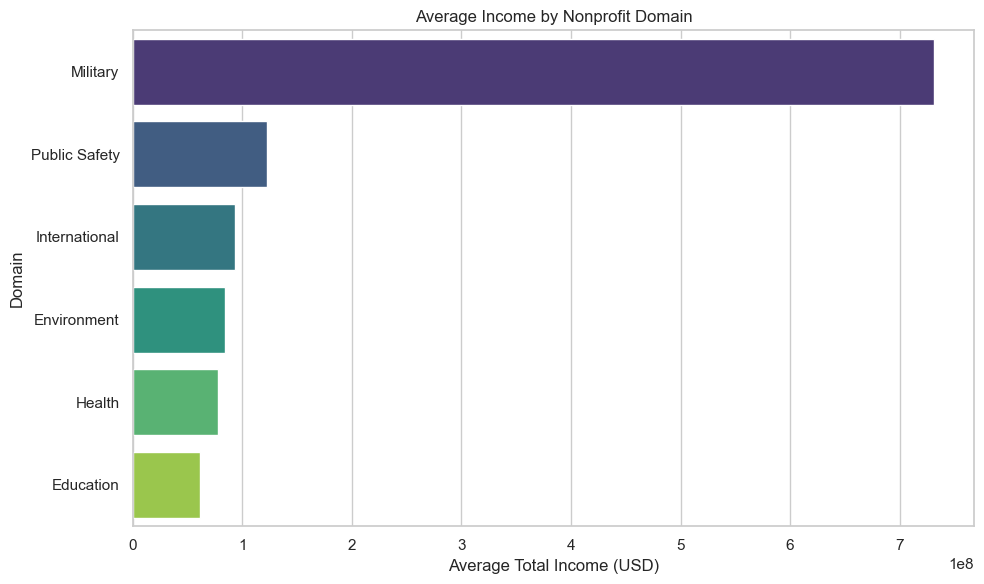

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_domain_avg, x='avg_income', y='domain', palette='viridis')

plt.title("Average Income by Nonprofit Domain")
plt.xlabel("Average Total Income (USD)")
plt.ylabel("Domain")
plt.tight_layout()
plt.show()


**Key Inference**:  
The Military domain stands out as the most financially dominant, with significantly higher average income compared to other sectors. Public Safety and International domains follow at a distance. This consolidation reinforces earlier findings from the modern code analysis and emphasizes the disproportionate funding received by defense-related nonprofit activities.


### Geographical Distribution of Nonprofit Organizations

This scatter plot maps the physical distribution of nonprofits across the continental United States using geospatial coordinates.

We selected `latitude` and `longitude` values from the dataset, filtering for valid U.S. mainland bounds (between 24–50°N and -125 to -65°W). Each point represents one organization, plotted in blue. A random 10,000-point sample is visualized to preserve performance.


In [51]:
query = """
    SELECT latitude, longitude, nccs_level_1_category
    FROM nccs_bmf
    WHERE latitude IS NOT NULL
      AND longitude IS NOT NULL
      AND latitude BETWEEN 24 AND 50
      AND longitude BETWEEN -125 AND -65
    LIMIT 10000;  -- Adjust for performance
"""
df_geo = pd.read_sql(query, engine)

# Preview
df_geo.head()


,latitude,longitude,nccs_level_1_category
0,34.83,-82.30,501C3 CHARITY
1,42.49,-96.40,501C3 CHARITY
2,41.58,-93.67,501CX NONPROFIT
3,41.58,-93.67,501CX NONPROFIT
4,41.58,-93.67,501CX NONPROFIT


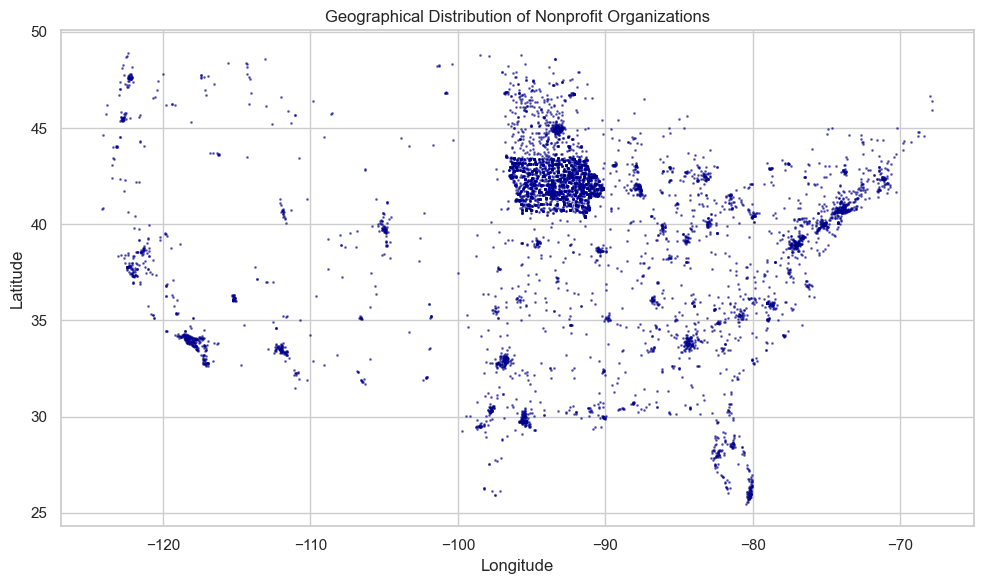

In [52]:
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(10, 6))
plt.scatter(df_geo['longitude'], df_geo['latitude'], s=1, alpha=0.5, color='darkblue')

plt.title("Geographical Distribution of Nonprofit Organizations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


**Key Inference**:  
Nonprofits cluster heavily in urbanized and coastal regions—particularly in California, the Northeast Corridor, Florida, and Texas. There's also a dense central cluster in the Midwest, suggesting regional hubs of nonprofit activity. This visualization can help geographically filter or target analysis based on location.

### Specialization Trend in Nonprofit Categories Over Time

This line plot captures how nonprofit specialization has evolved historically, using IRS ruling years and category granularity.

We calculated a "specialization index" by dividing the number of unique NTEE level 3 categories by the total number of nonprofits registered each year. The idea is to capture how diverse or specialized nonprofit missions are within each year’s cohort of registered organizations.


In [69]:
query = """
    SELECT 
        YEAR(organization_ruling_date) AS ruling_year,
        nccs_level_1_category,
        nccs_level_2_category,
        nccs_level_3_category,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE organization_ruling_date IS NOT NULL
      AND nccs_level_1_category IS NOT NULL
      AND nccs_level_2_category IS NOT NULL
      AND nccs_level_3_category IS NOT NULL
    GROUP BY ruling_year, nccs_level_1_category, nccs_level_2_category, nccs_level_3_category
    ORDER BY ruling_year;
"""
df_ntee = pd.read_sql(query, engine)

# Preview
df_ntee.head()


,ruling_year,nccs_level_1_category,nccs_level_2_category,nccs_level_3_category,org_count
0,1900,501C3 CHARITY,O,AR,3
1,1900,501C3 CHARITY,O,ED,1
2,1900,501C3 CHARITY,O,HE,2
3,1900,501C3 CHARITY,O,HS,17
4,1900,501C3 CHARITY,O,RE,11


In [70]:
# Specialization index = unique level 3 codes / total orgs that year
specialization_df = (
    df_ntee
    .groupby('ruling_year')
    .agg(
        total_orgs=('org_count', 'sum'),
        unique_level3=('nccs_level_3_category', 'nunique'),
        unique_level1=('nccs_level_1_category', 'nunique')
    )
    .assign(specialization_index=lambda df: df['unique_level3'] / df['total_orgs'])
    .reset_index()
)


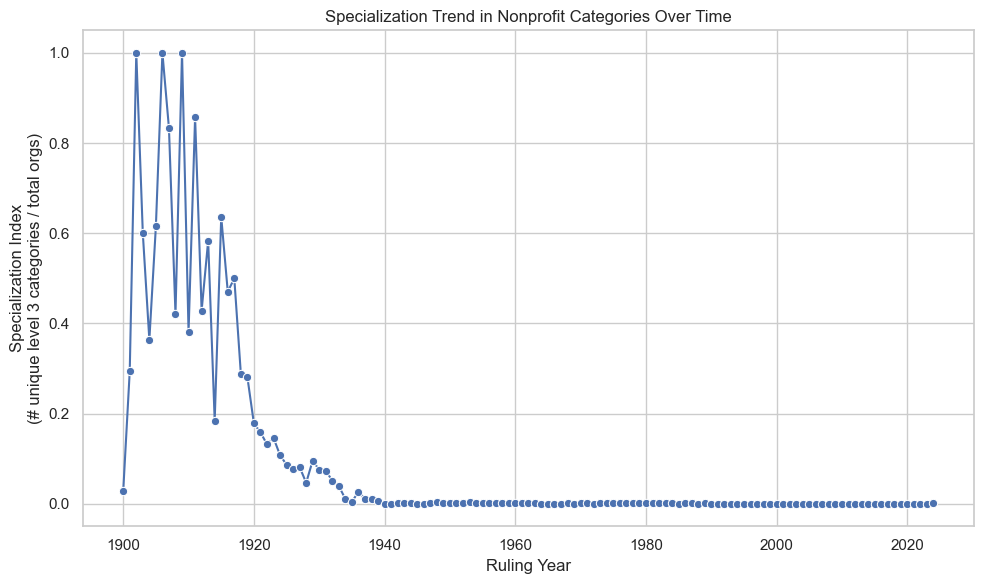

In [71]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=specialization_df, x='ruling_year', y='specialization_index', marker='o')

plt.title("Specialization Trend in Nonprofit Categories Over Time")
plt.xlabel("Ruling Year")
plt.ylabel("Specialization Index\n(# unique level 3 categories / total orgs)")
plt.grid(True)
plt.tight_layout()
plt.show()


**Key Inference**:  
The specialization index peaked in earlier decades, indicating a broader spread of focus areas among fewer organizations. Over time, especially post-1940, the index declined sharply—suggesting that newer nonprofits may increasingly cluster around fewer categories or that broad category definitions dominate filings. This trend might reflect consolidation, standardization, or policy-driven alignment in the nonprofit sector.

### Nonprofit Category Counts Over Time (NTEE Level 1)

This heatmap visualizes the volume of nonprofit organizations established each year, grouped by their NTEE Level 1 classification.

We aggregated the number of organizations by IRS ruling year and their top-level NTEE category. The resulting heatmap shows trends in nonprofit formation across high-level categories such as "501C3 CHARITY", "501CX NONPROFIT", and "501C3 PRIVATE FOUNDATION". Darker shades indicate years with a higher volume of new registrations in a given category.


In [80]:
query = """
    SELECT 
        YEAR(organization_ruling_date) AS ruling_year,
        nccs_level_1_category,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE organization_ruling_date IS NOT NULL
      AND nccs_level_1_category IS NOT NULL
    GROUP BY ruling_year, nccs_level_1_category
    ORDER BY ruling_year, org_count DESC;
"""
df_heatmap = pd.read_sql(query, engine)
df_heatmap.head()


In [83]:
# Pivot for heatmap: rows = category, columns = ruling year
heatmap_data = df_heatmap.pivot(index='nccs_level_1_category', columns='ruling_year', values='org_count').fillna(0)

# Sort by total count (optional)
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]


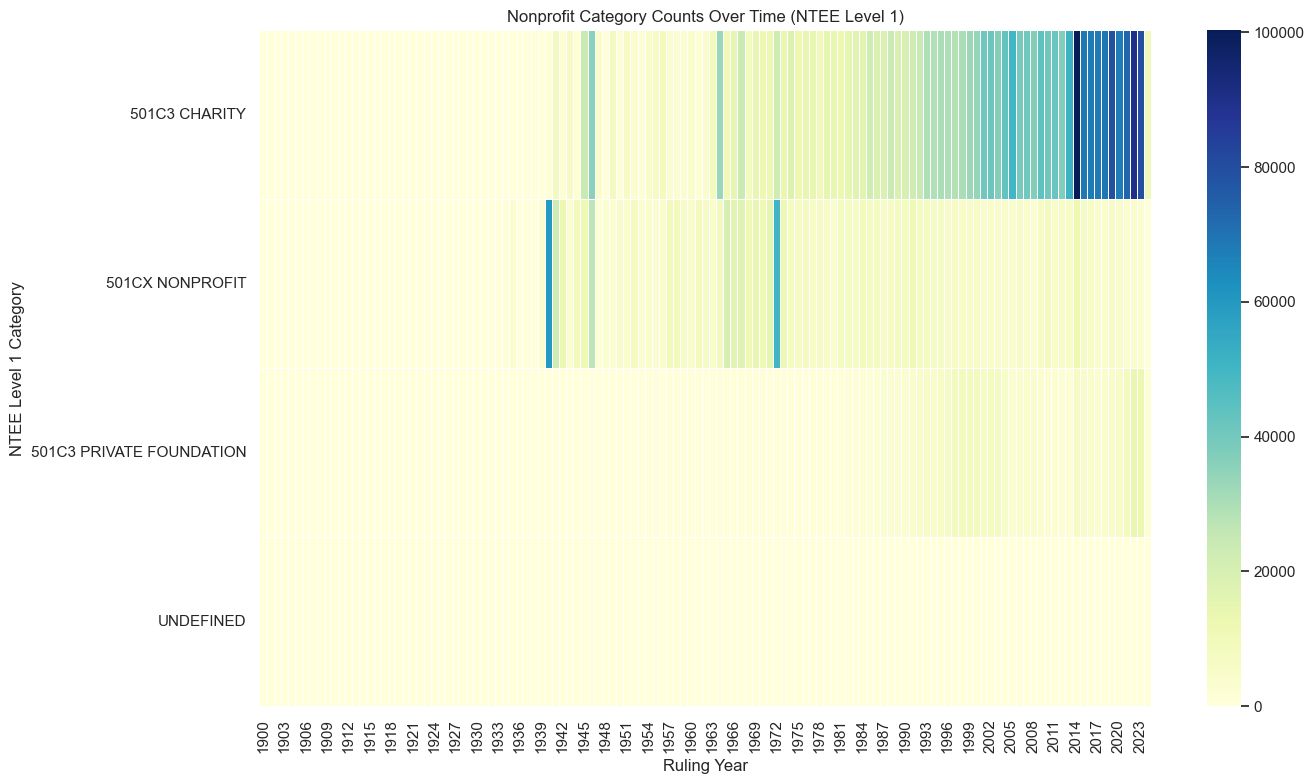

In [84]:
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)

plt.title("Nonprofit Category Counts Over Time (NTEE Level 1)")
plt.xlabel("Ruling Year")
plt.ylabel("NTEE Level 1 Category")
plt.tight_layout()
plt.show()


**Key Inference**:  
"501C3 CHARITY" dominates nonprofit registrations, especially from the 1990s onward, showing a clear upward trajectory. In contrast, "501CX NONPROFIT" organizations peaked sporadically during the mid-20th century. The relatively low and stable representation of "PRIVATE FOUNDATION" and "UNDEFINED" categories suggests more consistent and limited usage over time. This chart reveals how sector preferences have evolved, highlighting policy shifts and changing societal needs over the decades.

In [91]:
# Step 1: SQL query for modern category trends
query = """
    SELECT 
        ntee_modern_code,
        YEAR(organization_ruling_date) AS ruling_year,
        COUNT(*) AS org_count
    FROM nccs_bmf
    WHERE ntee_modern_code IS NOT NULL
      AND organization_ruling_date IS NOT NULL
    GROUP BY ntee_modern_code, ruling_year
    ORDER BY ruling_year, ntee_modern_code;
"""
df_modern_trends = pd.read_sql(query, engine)

# Step 2: Pivot the data for heatmap
heatmap_modern = df_modern_trends.pivot(index="ntee_modern_code", columns="ruling_year", values="org_count").fillna(0)

top_codes = heatmap_modern.sum(axis=1).sort_values(ascending=False).head(20).index
heatmap_modern = heatmap_modern.loc[top_codes]


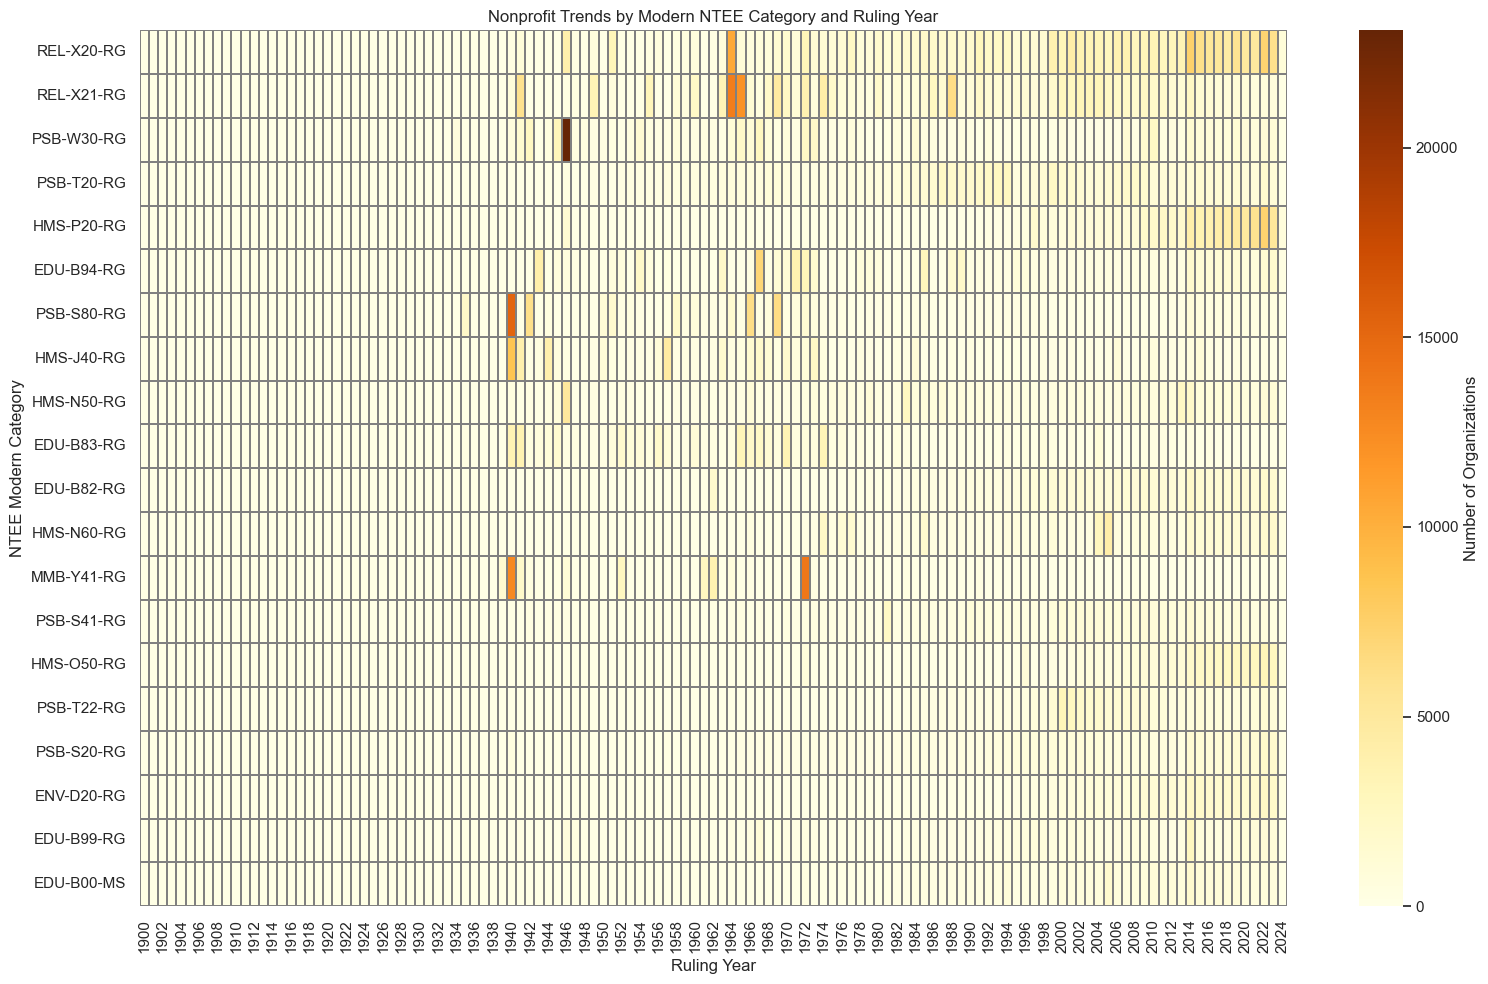

In [92]:
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_modern, cmap='YlOrBr', linewidths=0.3, linecolor='gray', cbar_kws={'label': 'Number of Organizations'})

plt.title("Nonprofit Trends by Modern NTEE Category and Ruling Year")
plt.xlabel("Ruling Year")
plt.ylabel("NTEE Modern Category")
plt.tight_layout()
plt.show()

### Organizational split between urban and rural

The pie chart below illustrates the distribution of nonprofit organizations between urban and rural areas. By categorizing each organization based on its location, we can observe the proportion of nonprofits serving urban communities compared to those in rural settings. This visualization highlights the concentration of nonprofit activity and may reveal disparities in organizational presence, potentially reflecting differences in population density, resource allocation, and community needs across urban and rural regions.


In [25]:
query = """
SELECT 
  CASE WHEN b.CENSUS_URBAN_AREA_CODE IS NOT NULL THEN 'Urban' ELSE 'Rural' END AS area_type,
  COUNT(*) AS org_count
FROM NCCS_Address_Metadata_org_loc o
JOIN NCCS_Address_Metadata_census_blocks b ON o.CENSUS_BLOCK_FIPS = b.CENSUS_BLOCK_FIPS
GROUP BY area_type
"""
df_urban_rural = pd.read_sql(query, engine)

# Preview
df_urban_rural.head()


,area_type,org_count
0,Urban,2818782
1,Rural,611399


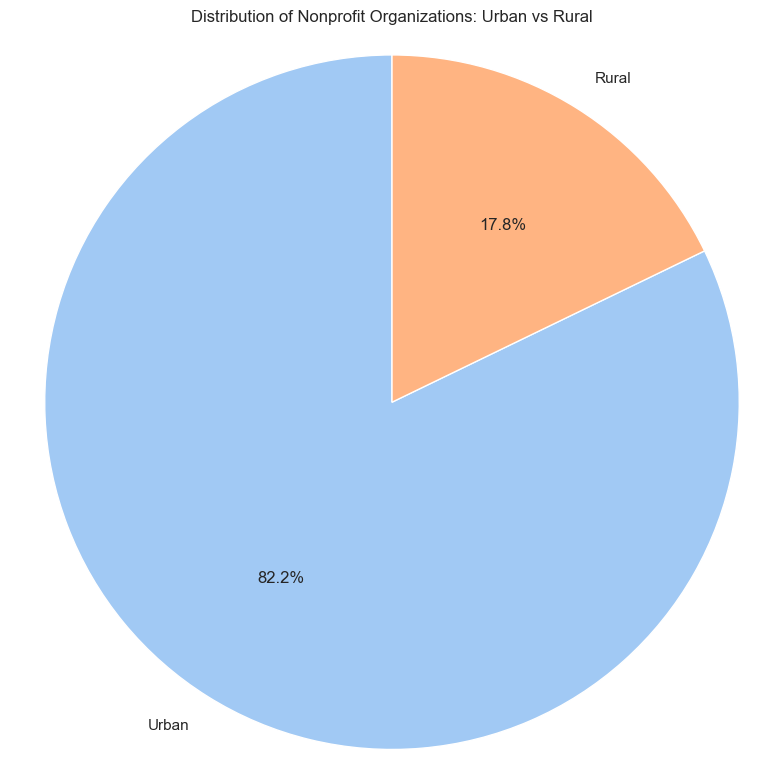

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(
    df_urban_rural['org_count'],
    labels=df_urban_rural['area_type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')[0:len(df_urban_rural)]
)
plt.title('Distribution of Nonprofit Organizations: Urban vs Rural')
plt.axis('equal')
plt.tight_layout()
plt.show()


#### Key Inference:
The pie chart above shows that the majority of nonprofit organizations are located in urban areas, with a much smaller proportion in rural areas. This indicates a significant concentration of nonprofit activity in urban regions, which may reflect higher population densities, greater resource availability, and increased demand for services in cities. Conversely, the lower presence of nonprofits in rural areas could point to potential gaps in service provision or differences in community needs and infrastructure.


### Number of organizations per address type

df_addr_type contains the count of nonprofit organizations grouped by their address type (ADDR_TYPE), such as PointAddress, Postal, PostalExt, Subaddress, and StreetAddress. This DataFrame is used to analyze how organizations are distributed across different types of address records in the dataset.


In [29]:
query = """
    SELECT ADDR_TYPE, COUNT(*) AS org_count
FROM NCCS_Address_Metadata_org_loc
GROUP BY ADDR_TYPE
ORDER BY org_count DESC;
"""
df_addr_type = pd.read_sql(query, engine)

# Preview
df_addr_type.head()


,ADDR_TYPE,org_count
0,PointAddress,1783685
1,Postal,693032
2,PostalExt,482890
3,Subaddress,244171
4,StreetAddress,161350


/var/folders/k9/v092rk_s0bncwn07z3t247qm0000gn/T/ipykernel_2861/1701328046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_addr_type, x='ADDR_TYPE', y='org_count', palette='pastel')


<Figure size 640x480 with 0 Axes>

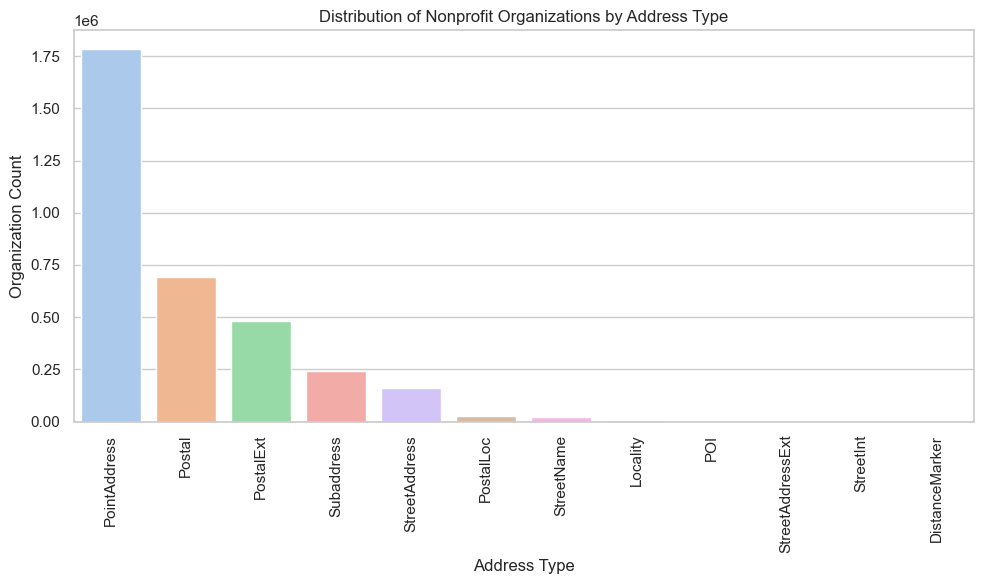

In [34]:

plt.clf()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_addr_type, x='ADDR_TYPE', y='org_count', palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Address Type')
plt.ylabel('Organization Count')
plt.title('Distribution of Nonprofit Organizations by Address Type')
plt.tight_layout()
plt.show()


#### Key Inference:
The bar plot above demonstrates that the majority of nonprofit organizations are associated with the "Subaddress" and "PointAddress" address types, followed by "Postal", "PostalExt", and "StreetAddress". This suggests that most organizations in the dataset have highly specific or detailed address records, which can be beneficial for accurate geocoding and spatial analysis. The lower counts for "StreetAddress" and "PostalExt" indicate these are less commonly used address types among nonprofits in the dataset.


### Geocoder score across address types

df_addr_score contains the average geocoder score (avg_score) for each address type (ADDR_TYPE) in the dataset.
This DataFrame is used to assess the geocoding quality of different types of address records associated with nonprofit organizations.


In [35]:
query = """
SELECT ADDR_TYPE, AVG(GEOCODER_SCORE) AS avg_score
FROM NCCS_Address_Metadata_org_loc
GROUP BY ADDR_TYPE
ORDER BY avg_score DESC
"""
df_addr_score = pd.read_sql(query, engine)

# Preview
df_addr_score.head()


,ADDR_TYPE,avg_score
0,Subaddress,99.877716
1,PointAddress,99.852518
2,StreetAddress,99.478725
3,Postal,98.718687
4,PostalLoc,98.617529


/var/folders/k9/v092rk_s0bncwn07z3t247qm0000gn/T/ipykernel_2861/2892097159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_addr_score, x='ADDR_TYPE', y='avg_score', palette='pastel')


<Figure size 640x480 with 0 Axes>

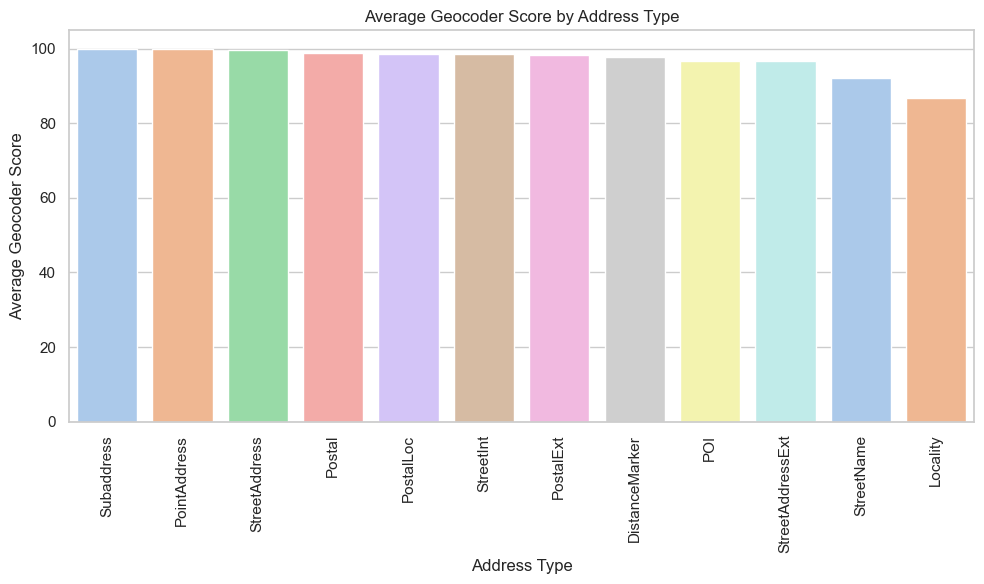

In [36]:
plt.clf()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_addr_score, x='ADDR_TYPE', y='avg_score', palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Address Type')
plt.ylabel('Average Geocoder Score')
plt.title('Average Geocoder Score by Address Type')
plt.tight_layout()
plt.show()


#### Key inference:
The bar plot shows that Subaddress and PointAddress types have the highest average geocoder scores, indicating these address types are geocoded with the greatest accuracy. In contrast, Postal and PostalLoc addresses have lower average scores, suggesting that geocoding is less precise for these types. This implies that the quality and specificity of address data significantly impact geocoding accuracy for nonprofit organizations. Also overall, the dataset is good given that each type has scores greater than 80%
